In [1]:
# import packages
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc
import os
from scipy.integrate import odeint
from scipy.signal import find_peaks, peak_prominences
import scipy.integrate as spi
import scipy.stats as st
from array import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
import scipy.io as io
import math
import random
import pickle
from sklearn.metrics import r2_score
from scipy.interpolate import CubicSpline
from scipy import stats
#from ipynb.fs.full.All_Functions import GetPopParams
#from ipynb.fs.full.All_Functions import GetPopParamsOmega
#from ipynb.fs.full.All_Functions import GetVLIndParams
#from ipynb.fs.full.All_Functions import RandVLIndParams
#from ipynb.fs.full.All_Functions import RandVLParams
#from ipynb.fs.full.All_Functions import PKPDParams
#from ipynb.fs.full.All_Functions import Cohort_Prep
#from ipynb.fs.full.All_Functions import VLModel
#from ipynb.fs.full.All_Functions import VLPKPD
#from ipynb.fs.full.All_Functions import PK_Model
#from ipynb.fs.full.All_Functions import PD_Model
#from ipynb.fs.full.All_Functions import SetInit
#from ipynb.fs.full.All_Functions import SimulateTreatment
#from ipynb.fs.full.All_Functions import Trial_Simulation

#from ipynb.fs.full.All_Functions import SimulateTreatmentPK
#from ipynb.fs.full.All_Functions import TreatmentImpact
#from ipynb.fs.full.All_Functions import CI_Calc
%matplotlib inline
%run All_Functions.ipynb

In [2]:
sns.__version__

'0.13.2'

In [5]:
data_File = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Data/NBA_Panoramic_Platcov_MPV_sympOnset.csv'
Data_df = pd.read_csv(data_File)

NBA = Data_df[Data_df.cat_Cohort == 'NBA']
PLATCOV_Cntrl = Data_df[Data_df.cat_Cohort == 'PLATCOV']
PLATCOV_Trtmnt = Data_df[Data_df.cat_Cohort == 'PLATCOV_trtmnt']
Panoramic_Cntrl= Data_df[Data_df.cat_Cohort == 'Panoramic']
Panoramic_Trtmnt= Data_df[Data_df.cat_Cohort == 'Panoramic_trtmnt']

PLATCOV = Data_df[(Data_df.cat_Cohort == 'PLATCOV') | (Data_df.cat_Cohort == 'PLATCOV_trtmnt')]
Panoramic = Data_df[(Data_df.cat_Cohort == 'Panoramic') | (Data_df.cat_Cohort == 'Panoramic_trtmnt')]
IDs_Tot = Data_df.ID.unique()
IDs_NBA = NBA.ID.unique()
IDs_Platcov_Cntrl = PLATCOV_Cntrl.ID.unique()
IDs_Platcov_trtmnt = PLATCOV_Trtmnt.ID.unique()

IDs_Panoramic_Cntrl = Panoramic_Cntrl.ID.unique()
IDs_Panoramic_trtmnt = Panoramic_Trtmnt.ID.unique()


IndParameters = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Projects/NBA_Omicron_MPV_Panoramic_Platcov_Trial_tau_CovNBA_PLACntrl_Trtmtn_prf_est_Emax=1_t0SympOnset/IndividualParameters/estimatedIndividualParameters.txt'
#r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Projects/NBA_Omicron_MPV_Panoramic_Platcov_Trial_tau_CovNBA_PLACntrl_Trtmtn_prf_est_Emax=1/IndividualParameters/estimatedIndividualParameters.txt'
PopParameters = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Projects/NBA_Omicron_MPV_Panoramic_Platcov_Trial_tau_CovNBA_PLACntrl_Trtmtn_prf_est_Emax=1_t0SympOnset/populationParameters.txt'
#r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Projects/NBA_Omicron_MPV_Panoramic_Platcov_Trial_tau_CovNBA_PLACntrl_Trtmtn_prf_est_Emax=1/populationParameters.txt'
IndParameters_test = r'/Users/sesmaeil/Downloads/NBAOmicron_PLATCOV_PANORAMIC_estimatedIndividualParameters-2.txt'

parameters_df = pd.read_csv(IndParameters)
parameters_df_test = pd.read_csv(IndParameters_test)
Popparameters_df = pd.read_csv(PopParameters)


Indparameters_MPV_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchCancerCenter/Schiffer Group - Shared Resources - Documents/COVID-19 Shared Resources/SARSCoV2ComboModeling/PK-PD Modeling/MPVestimatedIndividualParameters.txt'
Popparameters_MPV_file = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-SharedLibraries-FredHutchCancerCenter/Schiffer Group - Shared Resources - Documents/COVID-19 Shared Resources/SARSCoV2ComboModeling/PK-PD Modeling/MPVpopulationParameters.txt'

Indparameters_MPV = pd.read_csv(Indparameters_MPV_file)
Popparameters_MPV = pd.read_csv(Popparameters_MPV_file)


In [7]:
t_SymToTrtm_PLATCOV = PLATCOV.groupby('ID').time_symp.min()
t_SymToTrtm_panoramic = Panoramic.groupby('ID').time_symp.min()


In [9]:
NBA

,ID,time_symp,time,y,cens,cat_VaccStatus,cat_LineageBroad,cat_AgeGroup,cat_Cohort,treatment,amt
0,460_2,-8.0,-8.0,2.657610,1.0,Boosted,Omicron,1,NBA,0,NaN
1,460_2,-5.0,-5.0,2.657610,1.0,Boosted,Omicron,1,NBA,0,NaN
2,460_2,0.0,0.0,5.319870,0.0,Boosted,Omicron,1,NBA,0,NaN
3,460_2,1.0,1.0,4.573274,0.0,Boosted,Omicron,1,NBA,0,NaN
4,460_2,2.0,2.0,7.083168,0.0,Boosted,Omicron,1,NBA,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29679,3035_1,42.0,42.0,2.650000,1.0,No record,Omicron,2,NBA,0,NaN
29680,3035_1,44.0,44.0,2.650000,1.0,No record,Omicron,2,NBA,0,NaN
29681,3035_1,46.0,46.0,2.650000,1.0,No record,Omicron,2,NBA,0,NaN
29682,3035_1,48.0,48.0,2.650000,1.0,No record,Omicron,2,NBA,0,NaN


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
param_order = ['beta', 'phi', 'rho', 'k', 'delta', 'm', 'pi', 'c', 'tau']
fixed_params = dict({'c': 15, 'k':4})
param_dist = dict({'log10beta':'normal', 'log10phi':'normal', 'log10rho':'normal', 
                   'delta':'logNormal', 'h': 'logNormal', 'm': 'logNormal', 
                   'log10pi':'normal','tau': 'logNormal', 'tzero':'logitNormal',
                   'tzeromin': 0.75, 'tzeromax':20, 'Log10prf': 'normal'})


In [13]:
# Molnupiravir in vitro IC50
Emax = 1.00
IC50 = 0.177 #uMol
Hill = 2.05
PDOm = 0, 0.0, 0.0
MolMass = 329.31   #g/Mol
dose =800

In [15]:
def GetVLIndParams(parameters_df, ID, style = 'mode'):
    ''' 
    input:
        - data frame with parameter values as columns, individuals as rows
        - ID identifying individual of interest
        - style = 'mode' or 'mean' or 'SAEM' depending on which parameter values are preferred
    return:
        - dictionary with parameter names as key and parameter values as values
    '''
    i = ID
    cols = list(parameters_df)
    pid_params = parameters_df[parameters_df.id == i]
    values = []
    keys = []
    for c in cols:
        if style in c:
            k = c.split('_')[0]
            keys.append(k)
            v = pid_params[c].values[0]
            values.append(v)
    for i,(v,k) in enumerate(zip(values, keys)):
        if 'log10' in k:
            values[i] = 10**v
            keys[i] = k.split('0')[1]

    params = dict(zip(keys, values))
    return params

In [17]:
def ParamsPrep(Cohort, CohortStyle, GetVLIndParams, RandVLParams, parameters_df, Popparameters_df, fixed_params, param_order, param_dist,
               PKPDParams, Popparameters_PK, GetPopParams, GetPopParamsOmega, Emax, IC50, Hill,PDOm, dose):

    VLparams = []
    PKPD_params = []
    param_dict = []
    for ID in Cohort:
        if CohortStyle == 'direct':
            ind_params = GetVLIndParams(parameters_df, ID, style = 'mode')
        else:
            ind_params = RandVLParams(Popparameters_df, param_dist)
            
        _dict = {**fixed_params, **ind_params}
        param_dict.append(_dict)
        params = []
        for k in param_order:
            params.append(_dict[k])
        VLparams.append(params)
        pkpd =PKPDParams(Popparameters_PK, GetPopParams, GetPopParamsOmega, Emax, IC50, Hill, dose, PDOm)
        PKPD_params.append(pkpd)
    return VLparams, PKPD_params, param_dict

In [19]:
def PKPDParams(Popparameters, GetPopParams, GetParamsOmega, Emax, IC50, Hill, dose, PDOm):
    
    param_Order = ['ka', 'k12', 'k21', 'kcl', 'Vol', 'Emax', 'IC50', 'Hill']
    PKparams = GetPopParams(Popparameters, dose)
    PKparams_Val = PKparams['ka'], PKparams['kPL'], PKparams['kLP'], PKparams['kCl'],PKparams['Vol']
    PDparams = Emax, IC50, Hill
    PKPDparams = np.hstack((PKparams_Val, PDparams))
    
    PKOm = GetParamsOmega(Popparameters, dose)
    PKOm_Val = 0, 0, 0, 0, 0
    #PKOm['ka'], PKOm['kPL'], PKOm['kLP'], PKOm['kCl'],PKOm['Vol']
    PKPDOm = np.hstack((PKOm_Val, PDOm))
    eta = np.random.normal(np.zeros(len(PKPDOm)), PKPDOm, len(PKPDOm))
    PKPDInd = PKPDparams*np.exp(eta)
    if PKPDInd[5]>1:
        PKPDInd[5]=1
    return dict(zip(param_Order, PKPDInd))

In [21]:
def SetInit(param_dict):
    T_0 = 10**7
    R_0 = 0;
    E_0 = 0;
    I_0 = 0
    V_0 = param_dict['Vzero']
    Vm_0 = 0
    #param_dict['pi']*I_0/param_dict['c']
    return [T_0, R_0, E_0, I_0, V_0, Vm_0]

In [23]:
def Trial_Simulation_paramInput(TrtmntStrtDay, params, 
                                PKPDInd, param_dict, PotRed, MolMass, dose, SetInit, VLPKPD,
                               TreatmentLength = 5, TreatmentFrequency = 0.5):
        # import parameters
        # extract initial time
        t0 = -param_dict['tzero']
        # extract onset of symptoms from data
       # t_symp = filtered.SympOnsetDelay[filtered.ID == ID]
  #      TrtmntStrtDay = random.choice(range(0,4)) #treatment starting within 3 days of synptom onset
        t_end = 30 #duration of simulation 30 days after symptom onset. 
        #TrtmntStrtDay+14 # the duration of simulation (14 days after the start of treatment)
        init = SetInit(param_dict)
        init.extend([0,0,0])
        
        dosetimes = TrtmntStrtDay + np.arange(0,TreatmentLength,TreatmentFrequency)
     #   print(dosetimes[0])
     #   if (t0 > t_symp.values[0]):
      #      n=n+1
      #      continue
        t,y = SimulateTreatment(VLPKPD, init, t0, 0.001, t_end, params, PKPDInd, dose, dosetimes, PotRed, MolMass)
        return t, y, dosetimes

In [25]:
def VLPKPD(y, t, beta, phi, rho, k, delta, m, pi, c,tAI, ka, k12, kcl, k21,Vol, MolMass,E_max, IC50, Hill_Coeff):
    T,R,E,I,V,Vm, Ag, A1, A2 = y
    
    # PK model 
    dAg = -ka*Ag
    dA1 = ka*Ag+k21*A2-(kcl+k12)*A1
    dA2 = k12*A1-k21*A2   
    
    # PD model 
    conc = np.maximum(A1,10**-8)*10**6/Vol/MolMass # # convert to from mg/mL to micromolar
    epsM = np.divide(np.multiply(E_max,np.power(conc,Hill_Coeff)),(np.power(IC50, Hill_Coeff)+np.power(conc,Hill_Coeff)))
        
    # within-host treatment model
    if t > tAI:
        m_AI = m
    else:
        m_AI = 0
    
    
    ddt_T = -beta*T*V - phi*I*T + rho*R
    ddt_R = phi*I*T -rho*R
    ddt_E = beta*T*V - k*E
    ddt_I = k*E - delta*I - m_AI*I
    if I>=1:
        ddt_V = (1-epsM)*pi*I-c*V
        ddt_Vm = epsM*pi*I-c*Vm
    else:
        ddt_V = -c*V
        ddt_Vm = -c*Vm

    return  ddt_T, ddt_R, ddt_E, ddt_I, ddt_V, ddt_Vm, dAg, dA1, dA2


In [27]:
def SimulateTreatment(VLPKPD, init, tzero, dt, tend, params, PKPDInd, dose, dosetimes, PotRed, MolMass):
    #Nirmatrelvir PD parameters
    E_max = PKPDInd['Emax']
    Hill_Coeff = PKPDInd['Hill']
    IC50 = PotRed*PKPDInd['IC50']

    #Nirmatrelvir PK Parameters for each individual
    ka = PKPDInd['ka']
    k12 = PKPDInd['k12']
    k21 = PKPDInd['k21']
    kcl = PKPDInd['kcl']
    Vol = PKPDInd['Vol']
    params_local = params.copy()
    params_local.extend([ka, k12, kcl, k21,Vol, MolMass, E_max, IC50, Hill_Coeff])
    args = tuple(params_local)
  
    if tzero==dosetimes[0]:
        for j in range(0,len(dosetimes)-1):
            init[6] = init[6] + dose 
            ttemp = np.arange(dosetimes[j],dosetimes[j+1],dt)
            ytemp = spi.odeint(VLPKPD, init, ttemp, args = args)
            init = ytemp[-1,:].T
            if j==0:
                y= ytemp.copy()
                t= ttemp.copy()
            else:
                y = np.concatenate((y,ytemp), axis=0)
                t = np.concatenate((t,ttemp))
    else:       
        
        # simulate infection from tzero up to 1st dose
        t = np.arange(tzero, dosetimes[0],dt)
        # simulate using scipy integrate
        y = spi.odeint(VLPKPD, init, t, args = args)
   
        ytemp = y.copy()

        #loop through dose values
        for j in range(0,len(dosetimes)-1):
            init = ytemp[-1,:].T
            init[6] = init[6] + dose 
            ttemp = np.arange(dosetimes[j],dosetimes[j+1],dt)
        
            ytemp = spi.odeint(VLPKPD, init, ttemp, args = args)
            t=np.concatenate((t,ttemp))
            y=np.concatenate((y,ytemp),axis=0)        
    #simulate until tend
    init = ytemp[-1,:].T
    init[6] = init[6] + dose 
    ttemp = np.arange(dosetimes[-1],tend,dt)
    ytemp = spi.odeint(VLPKPD, init, ttemp, args = args)
    t=np.concatenate((t,ttemp))
    y=np.concatenate((y,ytemp),axis=0)  
    return t, y

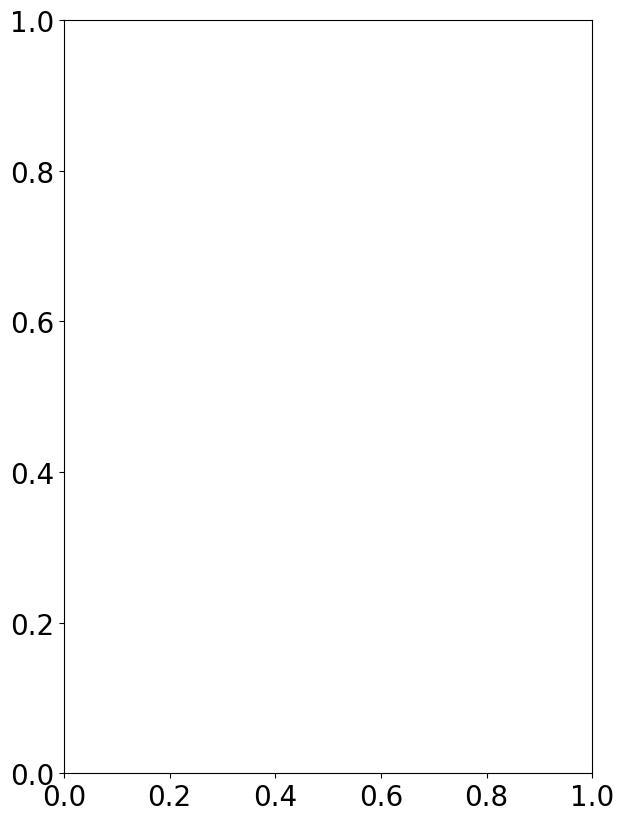

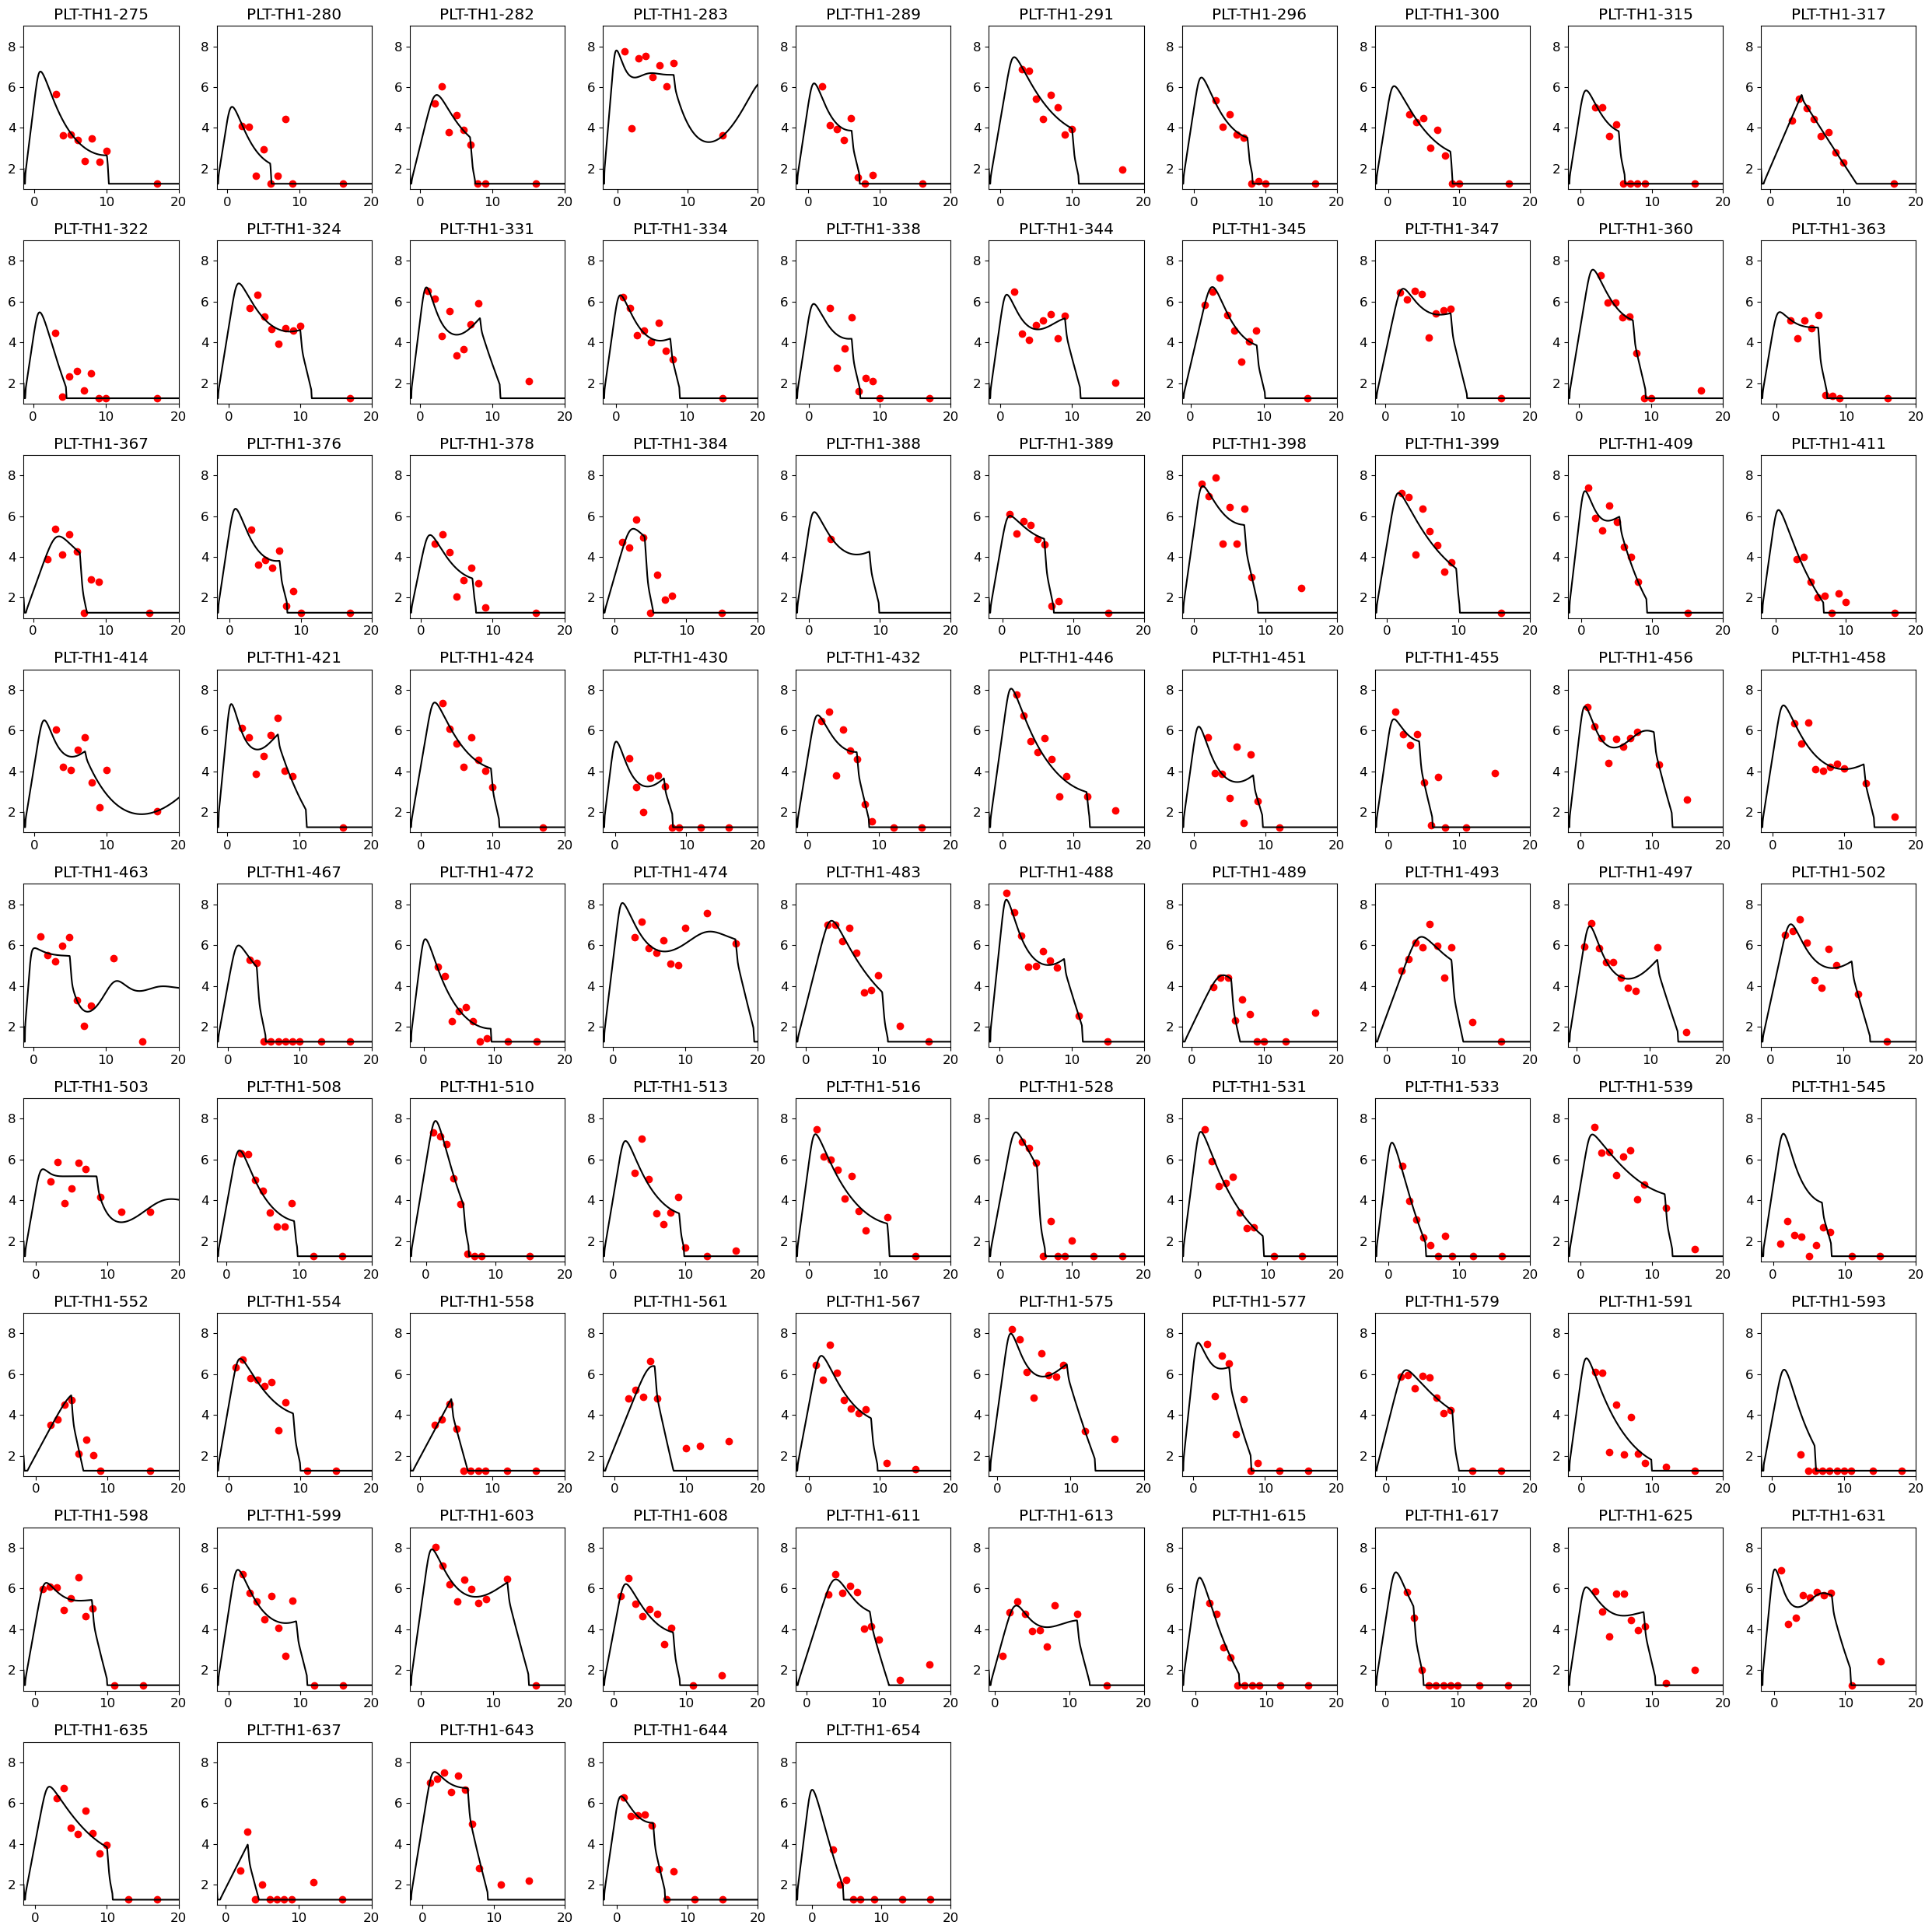

In [38]:
fig = plt.figure(figsize = (25,25))
plt.rcParams.update({'font.size': 12})
Cohort = IDs_Platcov_Cntrl
dose = 0

drop_VL_PLATCOV_cntrl=[]
AUC_PLATCOV_Cntrl = []
VL_PT_PLATCOV_Cntrl = []
VLInd, PKPD_Params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                            parameters_df, Popparameters_df, fixed_params, 
                                            param_order, param_dist, PKPDParams, 
                                            Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                            IC50, Hill,PDOm, dose=8*10**8)
for idi, ID in zip(range(0,len(Cohort)), Cohort):
        data = PLATCOV_Cntrl[PLATCOV_Cntrl.ID == ID]        
        TrtmntStrtDay = data['time_symp'].values[0]
        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_Params[idi], param_dict[idi], 
                                                             10**param_dict[idi]['Log10prf'], MolMass, dose, SetInit, VLPKPD,
                                                             TreatmentLength = 5, TreatmentFrequency = 0.5)
       

        data_t = data['time_symp']
        data_y = data['y']
        T,R,E,I,V, Vm, Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V+Vm,10**1.26))
        tstart = np.argwhere(t>=TrtmntStrtDay)[0][0]
        tend = np.argwhere(t>=TrtmntStrtDay)[0][0]+16000
        t5 = np.argwhere(t>=TrtmntStrtDay+5)[0][0]
        drop_VL_PLATCOV_cntrl.append(X[tstart:tend]-X[tstart])
        VL_PT_PLATCOV_Cntrl.append(X[tstart:tend])
        AUC_PLATCOV_Cntrl.append(auc(t[tstart:t5], X[tstart:t5]))
        plt.subplot(9,10, idi+1)
        plt.plot(data_t, data_y, 'o', color = 'r')
        plt.plot(t, X, color = 'black')
        plt.xlim([-param_dict[idi]['tzero'], 20])
        plt.ylim([1,9])
        plt.title(ID)
        plt.tight_layout()
Mean_drop_VL_TotPop_Cntrl_PLATCOV=np.mean(drop_VL_PLATCOV_cntrl, axis=0)
plt.savefig('Fig/Platcov_Cntrl_IndFits.png')
plt.savefig('Fig/Platcov_Cntrl_IndFits.svg')
plt.show()

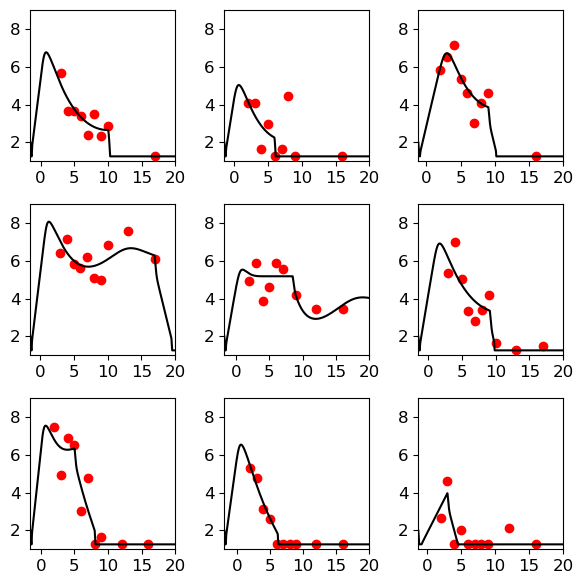

In [31]:
fig = plt.figure(figsize = (6,6))
plt.rcParams.update({'font.size': 12})
Cohort = IDs_Platcov_Cntrl
dose = 0
TreatmntStrtDay = np.zeros(len(Cohort))
VLInd, PKPD_Params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                            parameters_df, Popparameters_df, fixed_params, 
                                            param_order, param_dist, PKPDParams, 
                                            Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                            IC50, Hill,PDOm, dose=8*10**8)
IDs = ['PLT-TH1-275', 'PLT-TH1-280', 'PLT-TH1-345', 'PLT-TH1-474', 'PLT-TH1-513', 
       'PLT-TH1-637','PLT-TH1-503', 'PLT-TH1-615', 'PLT-TH1-577']
idis = [i for i in range(len(Cohort)) if Cohort[i] in IDs]
i=0
for idi, ID, TrtmntStrtDay in zip(idis, Cohort[idis], TreatmntStrtDay[idis]):
        
        data = PLATCOV_Cntrl[PLATCOV_Cntrl.ID == ID]        
        TrtmntStrtDay = data['time_symp'].values[0]

        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_Params[idi], param_dict[idi], 
                                                             10**param_dict[idi]['Log10prf'], MolMass, dose, SetInit, VLPKPD,
                                                             TreatmentLength = 5, TreatmentFrequency = 0.5)
        data_t = data['time_symp']
        data_y = data['y']
        T,R,E,I,V,Vm,  Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V+Vm,10**1.26))
        plt.subplot(3,3, i+1)
        plt.plot(data_t, data_y, 'o', color = 'r')
        plt.plot(t, X, color = 'black')
        plt.xlim([-param_dict[idi]['tzero'], 20])
        plt.ylim([1,9])
        plt.xticks([0,5,10,15,20])
       # plt.title(ID)
        plt.tight_layout()
        i=i+1
plt.savefig('Fig/Platcov_Cntrl_SampleIndFits.png')
plt.savefig('Fig/Platcov_Cntrl_SampleIndFits.svg')
plt.show()

{'c': 15, 'k': 4, 'beta': 4.9548441647359945e-08, 'pi': 854.2401897844785, 'rho': 0.11481192536328892, 'phi': 2.5999200906475748e-05, 'delta': 2.2213, 'm': 15.6027, 'tau': 7.9955, 'tzero': 1.50393, 'Vzero': 97, 'Log10prf': -0.828189}


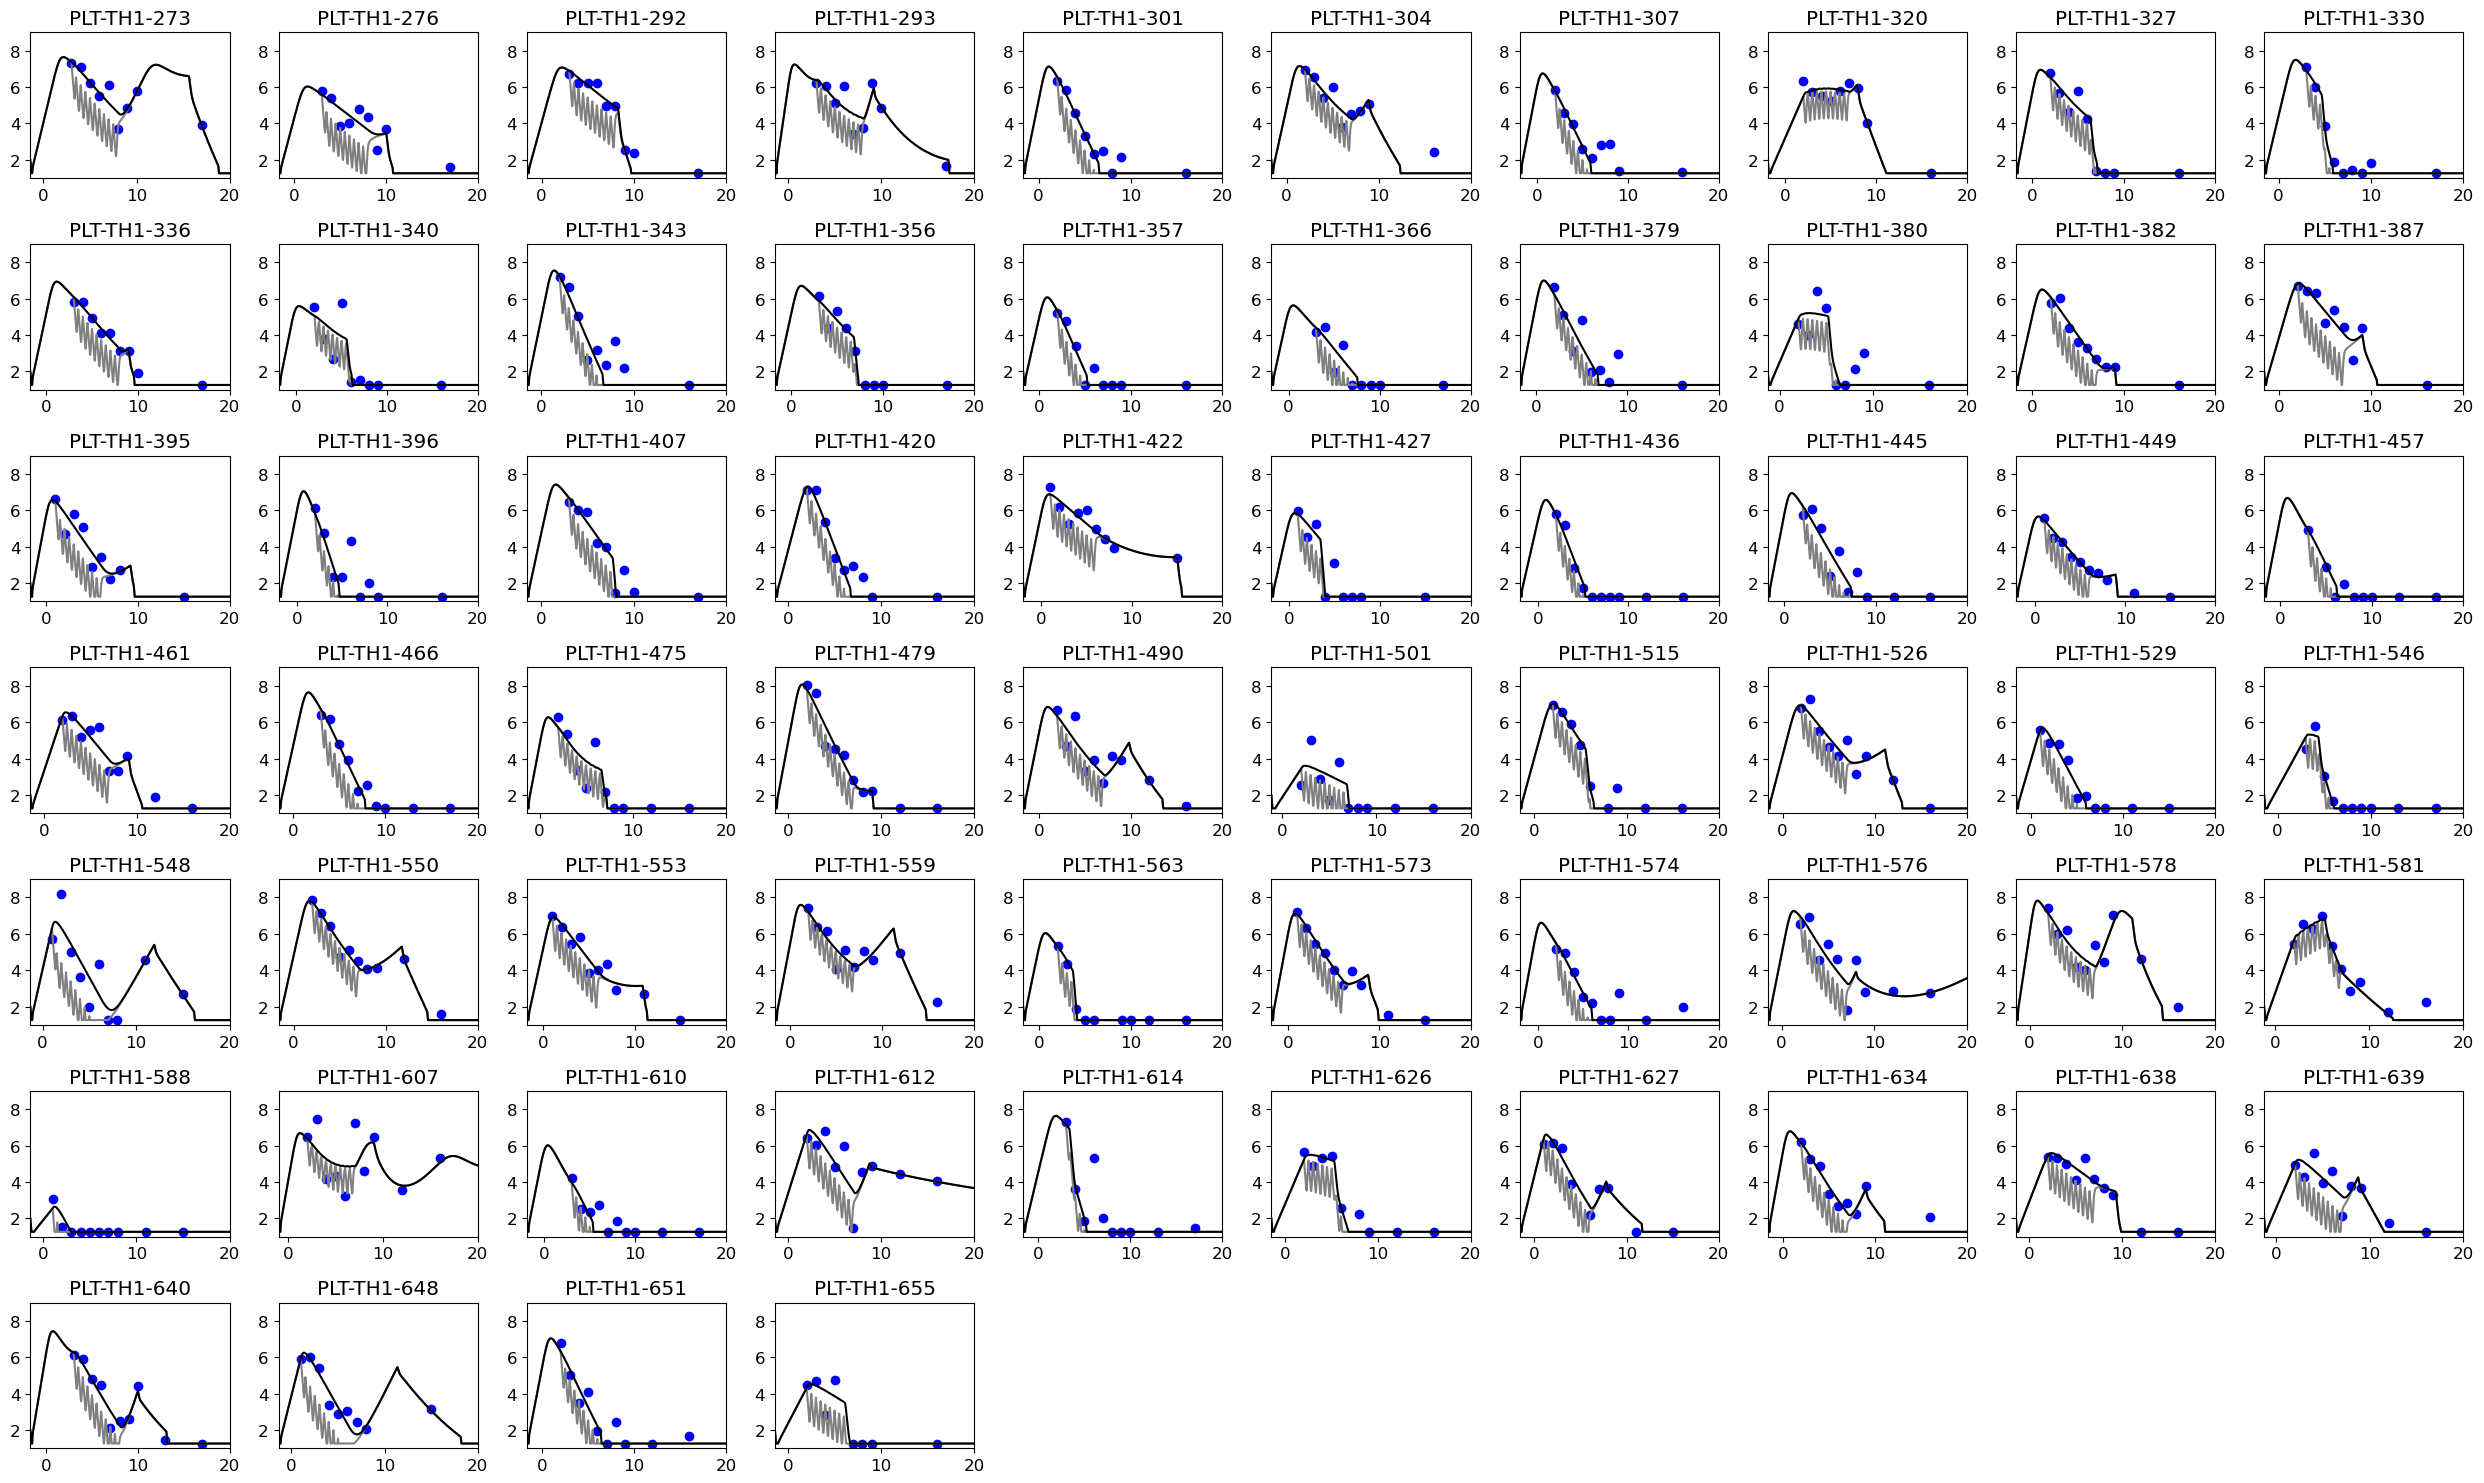

In [40]:
fig = plt.figure(figsize = (25,15))
plt.rcParams.update({'font.size': 12})
Cohort = IDs_Platcov_trtmnt
dose = 800
drop_VL_PLATCOV_trtmnt = []
active_drop_VL_PLATCOV_trtmnt = []
AUC_PLATCOV_Trtmnt = []
Active_AUC_PLATCOV_Trtmnt = []
VL_PT_PLATCOV_Trtmnt=[]
VL_PT_active_PLATCOV_Trtmnt = []
TreatmntStrtDay = np.zeros(len(Cohort))
VLInd, PKPD_Params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                            parameters_df, Popparameters_df, fixed_params, 
                                            param_order, param_dist, PKPDParams, 
                                            Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                            IC50, Hill,PDOm, dose=8*10**8)
for idi, ID in zip(range(0,len(Cohort)), Cohort):
        
        data = PLATCOV_Trtmnt[PLATCOV_Trtmnt.ID == ID]
        TrtmntStrtDay = data['time_symp'].values[0]
        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_Params[idi], param_dict[idi], 
                                                             10**param_dict[idi]['Log10prf'], MolMass, dose, SetInit, VLPKPD,
                                                             TreatmentLength = 5, TreatmentFrequency = 0.5)
        if ID == 'PLT-TH1-576':
            print(param_dict[idi])
        data_t = data['time_symp']
        data_y = data['y']
        T,R,E,I,V, Vm, Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V+Vm,10**1.26))
        X_active = np.log10(np.maximum(V,10**1.26))
        tstart = np.argwhere(t>=TrtmntStrtDay)[0][0]
        tend = np.argwhere(t>=TrtmntStrtDay+16)[0][0]
        t5 = np.argwhere(t>=TrtmntStrtDay+5)[0][0]
        drop_VL_PLATCOV_trtmnt.append(X[tstart:tend]-X[tstart])
        active_drop_VL_PLATCOV_trtmnt.append(X_active[tstart:tend]-X_active[tstart])
        AUC_PLATCOV_Trtmnt.append(auc(t[tstart:t5],X[tstart:t5]))
        Active_AUC_PLATCOV_Trtmnt.append(auc(t[tstart:t5],X_active[tstart:t5]))
        VL_PT_PLATCOV_Trtmnt.append(X[tstart:tend])
        VL_PT_active_PLATCOV_Trtmnt.append(X_active[tstart:tend])
        plt.subplot(7,10, idi+1)
        plt.plot(data_t, data_y, 'o', color = 'b')
        plt.plot(t, X_active, color = 'grey')
        plt.plot(t, X, color = 'black')
        
        plt.xlim([-param_dict[idi]['tzero'], 20])
        plt.ylim([1, 9])
        plt.title(ID)
        plt.tight_layout()
        
Mean_drop_VL_TotPop_Trtmnt_PLATCOV=np.mean(drop_VL_PLATCOV_trtmnt, axis=0)
Active_Mean_drop_VL_TotPop_Trtmnt_PLATCOV=np.mean(active_drop_VL_PLATCOV_trtmnt, axis=0)
plt.savefig('Fig/Platcov_Trtmnt_IndFits.png')
plt.savefig('Fig/Platcov_Trtmnt_IndFits.svg')
plt.show()

In [42]:
pickle.dump(drop_VL_PLATCOV_cntrl, open('TotVdrop_Cntrl_PLATCOV_trialpartis.pickle', 'wb')) 
pickle.dump(drop_VL_PLATCOV_trtmnt, open('TotVdrop_PLATCOV_trialpartis.pickle', 'wb')) 
pickle.dump(active_drop_VL_PLATCOV_trtmnt, open('activeVdrop_PLATCOV_trialpartis.pickle', 'wb'))

pickle.dump(AUC_PLATCOV_Cntrl, open('AUC_Cntrl_PLATCOV_trialpartis.pickle', 'wb')) 
pickle.dump(AUC_PLATCOV_Trtmnt, open('AUC_PLATCOV_trialpartis.pickle', 'wb')) 
pickle.dump(Active_AUC_PLATCOV_Trtmnt, open('activeAUC_PLATCOV_trialpartis.pickle', 'wb'))

pickle.dump(VL_PT_PLATCOV_Cntrl, open('VL_PT_Cntrl_PLATCOV_trialpartis.pickle', 'wb')) 
pickle.dump(VL_PT_PLATCOV_Trtmnt, open('VL_PT_PLATCOV_trialpartis.pickle', 'wb')) 
pickle.dump(VL_PT_active_PLATCOV_Trtmnt, open('VL_PT_active_PLATCOV_trialpartis.pickle', 'wb'))

In [46]:
t_5 = np.argwhere(np.linspace(0, 15.999, 16000)>=5)[0][0]

In [48]:
Mean_drop_VL_TotPop_Trtmnt_PLATCOV[t_5]

-3.5522287973653253

In [50]:
Mean_drop_VL_TotPop_Cntrl_PLATCOV[t_5]

-2.2274250866446184

In [52]:
Mean_drop_VL_TotPop_Cntrl_PLATCOV[t_5]-Active_Mean_drop_VL_TotPop_Trtmnt_PLATCOV[t_5]

1.6906283782629514

In [54]:
Mean_drop_VL_TotPop_Cntrl_PLATCOV[t_5]-Mean_drop_VL_TotPop_Trtmnt_PLATCOV[t_5]

1.324803710720707

In [56]:
Mean_drop_VL_TotPop_Trtmnt_PLATCOV[t_5]-Active_Mean_drop_VL_TotPop_Trtmnt_PLATCOV[t_5]

0.3658246675422445

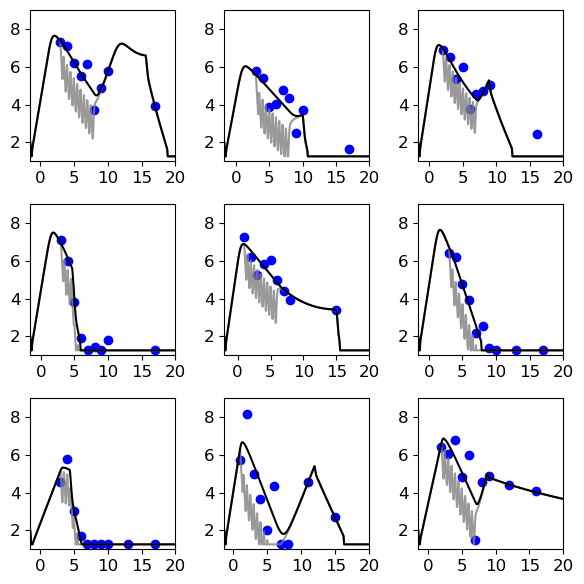

In [63]:
fig = plt.figure(figsize = (6,6))
plt.rcParams.update({'font.size': 12})
Cohort = IDs_Platcov_trtmnt
dose = 800

VLInd, PKPD_Params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                            parameters_df, Popparameters_df, fixed_params, 
                                            param_order, param_dist, PKPDParams, 
                                            Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                            IC50, Hill,PDOm, dose=8*10**8)
IDs = ['PLT-TH1-276', 'PLT-TH1-304', 'PLT-TH1-422', 'PLT-TH1-273', 'PLT-TH1-466', 
       'PLT-TH1-546', 'PLT-TH1-612', 'PLT-TH1-548', 'PLT-TH1-330']
idis = [i for i in range(len(Cohort)) if Cohort[i] in IDs]
i=0
for idi, ID in zip(idis, Cohort[idis]):
        
        data = PLATCOV_Trtmnt[PLATCOV_Trtmnt.ID == ID]
        TrtmntStrtDay = data['time_symp'].values[0]
        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_Params[idi], param_dict[idi], 
                                                             10**param_dict[idi]['Log10prf'], MolMass, dose, SetInit, VLPKPD,
                                                             TreatmentLength = 5, TreatmentFrequency = 0.5)
        data = PLATCOV_Trtmnt[PLATCOV_Trtmnt.ID == ID]
        data_t = data['time_symp']
        data_y = data['y']
        T,R,E,I,V, Vm, Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V+Vm,10**1.26))
        X_active = np.log10(np.maximum(V,10**1.26))
        plt.subplot(3,3, i+1)
        plt.plot(data_t, data_y, 'o', color = 'b')
        plt.plot(t, X_active, color = 'grey', alpha=0.8)
        plt.plot(t, X, color = 'black')
        plt.xlim([-param_dict[idi]['tzero'], 20])
        plt.ylim([1, 9])
        plt.xticks([0, 5, 10, 15,20])
       # plt.title(ID)
        plt.tight_layout()
        i = i+1
plt.savefig('Fig/Platcov_Trtmnt_SampleIndFits.png')
plt.savefig('Fig/Platcov_Trtmnt_SampleIndFits.svg')
plt.show()

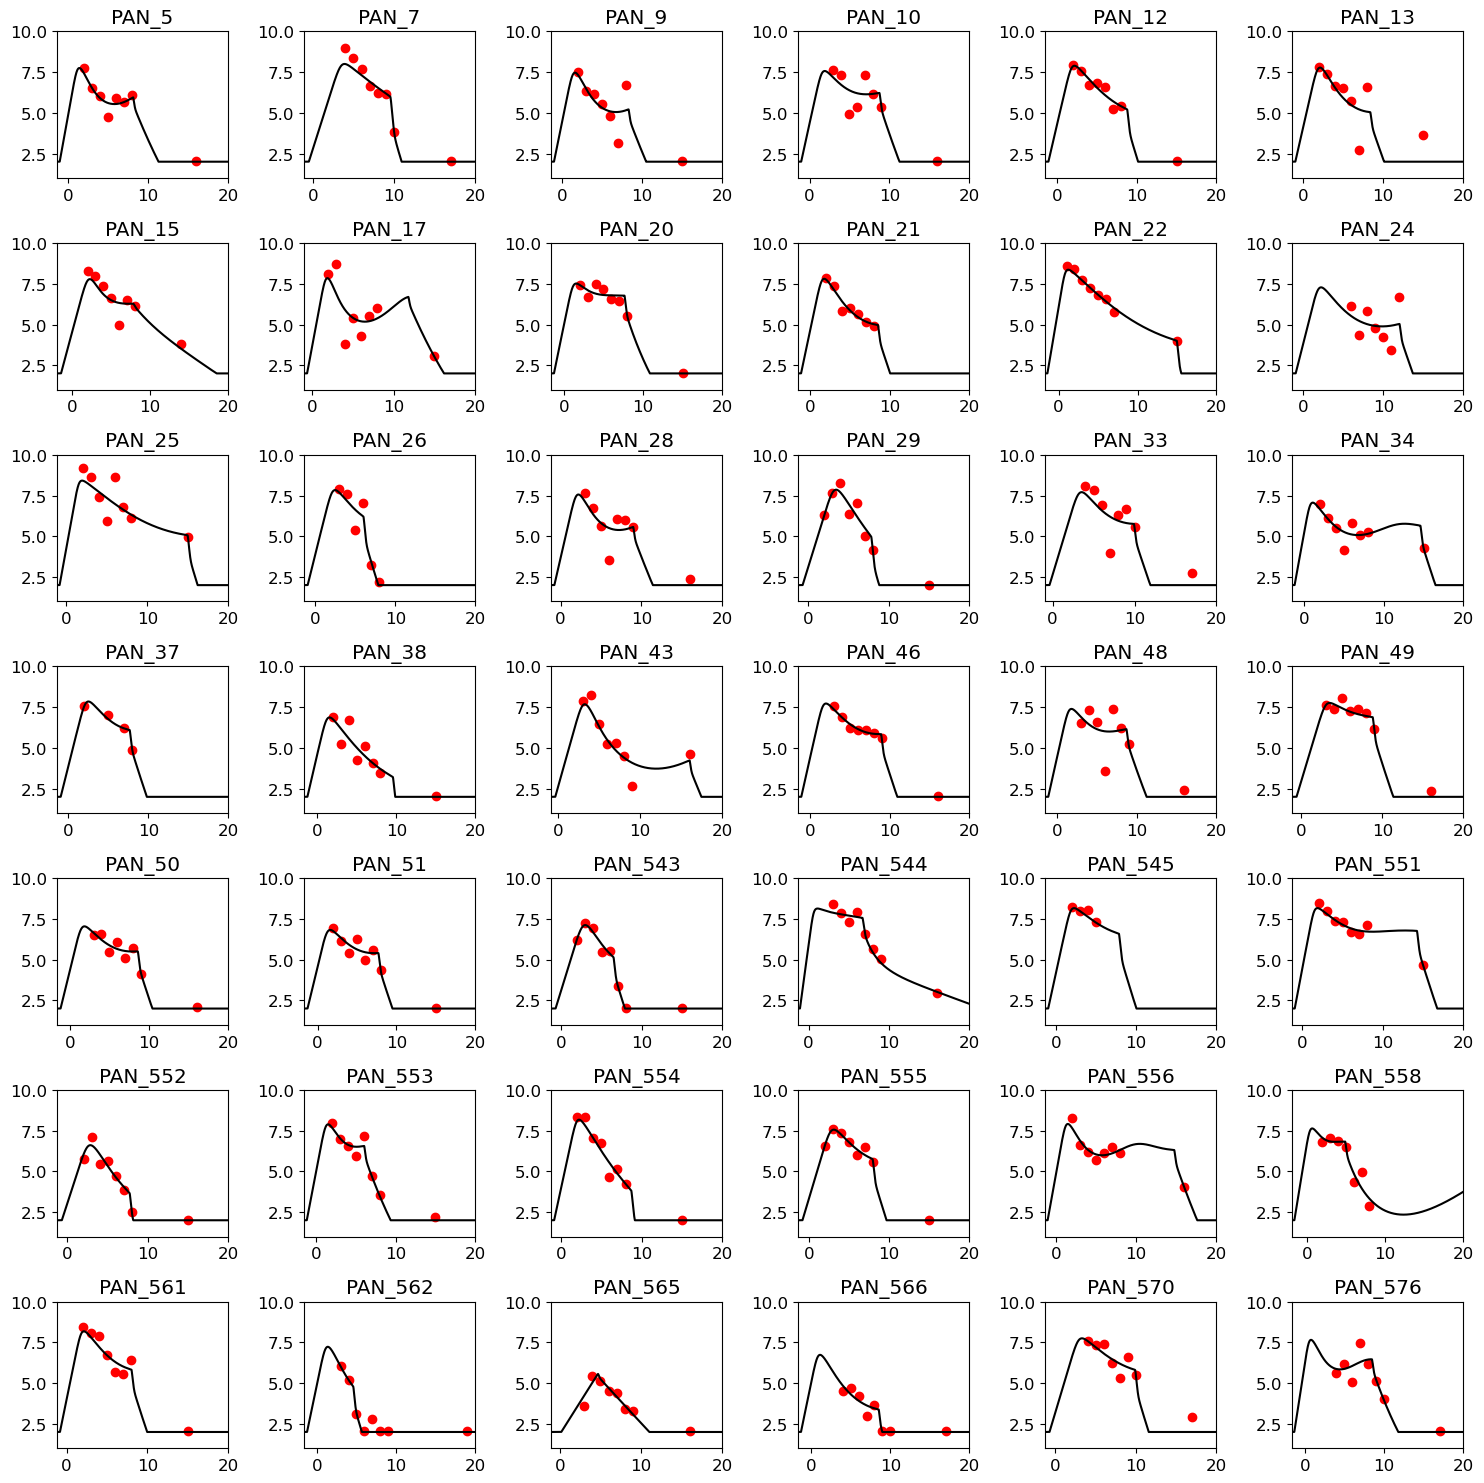

In [58]:
fig = plt.figure(figsize = (15,15))
plt.rcParams.update({'font.size': 12})
Cohort = IDs_Panoramic_Cntrl
dose = 0

drop_VL_cntrl=[]
AUC_PANORAMIC_Cntrl=[]
VL_PT_PANORAMIC_Cntrl=[]
VLInd, PKPD_Params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                            parameters_df, Popparameters_df, fixed_params, 
                                            param_order, param_dist, PKPDParams, 
                                            Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                            IC50, Hill,PDOm, dose=8*10**8)
for idi, ID in zip(range(0,len(Cohort)), Cohort):
        
        data = Panoramic_Cntrl[Panoramic_Cntrl.ID == ID]
        TrtmntStrtDay = data['time_symp'].values[0]
        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_Params[idi], param_dict[idi], 
                                                             10**param_dict[idi]['Log10prf'], MolMass, dose, SetInit, VLPKPD,
                                                             TreatmentLength = 5, TreatmentFrequency = 0.5)
       

        data_t = data['time_symp']
        data_y = data['y']
        T,R,E,I,V, Vm, Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V+Vm,10**2))
        tstart = np.argwhere(t>=TrtmntStrtDay)[0][0]
        tend = np.argwhere(t>=TrtmntStrtDay)[0][0]+16000
        t5 = np.argwhere(t>=TrtmntStrtDay+5)[0][0]
        drop_VL_cntrl.append(X[tstart:tend]-X[tstart])
        AUC_PANORAMIC_Cntrl.append(auc(t[tstart:t5], X[tstart:t5]))
        VL_PT_PANORAMIC_Cntrl.append(X[tstart:tend])
        plt.subplot(7,6, idi+1)
        plt.plot(data_t, data_y, 'o', color = 'r')
        plt.plot(t, X, color = 'black')
        plt.xlim([-param_dict[idi]['tzero'], 20])
        plt.ylim([1,10])
        plt.title(ID)
        plt.tight_layout()
        
Mean_drop_VL_TotPop_Cntrl_Panoramic=np.mean(drop_VL_cntrl, axis=0)
plt.savefig('Fig/Panoramic_Cntrl_IndFits.png')
plt.savefig('Fig/Panoramic_Cntrl_IndFits.svg')
plt.show()

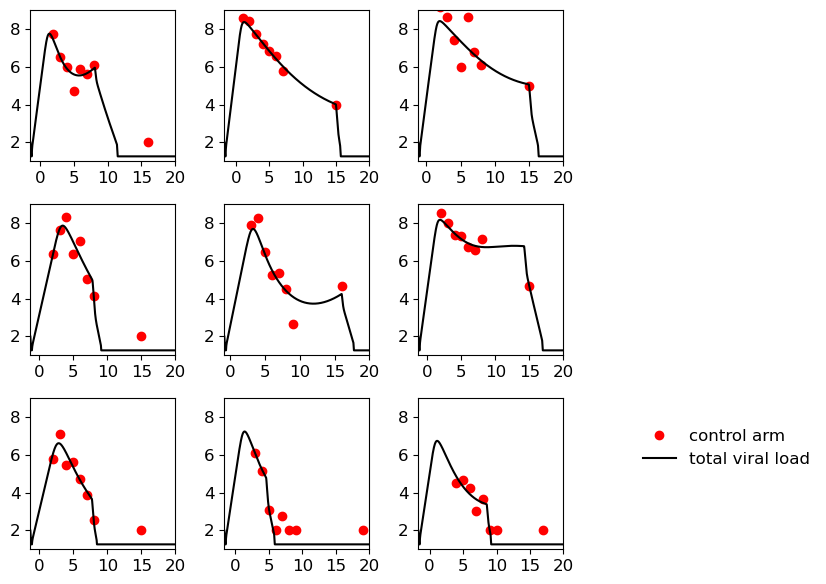

In [60]:
fig = plt.figure(figsize = (6,6))
plt.rcParams.update({'font.size': 12})
Cohort = IDs_Panoramic_Cntrl
dose = 0

VLInd, PKPD_Params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                            parameters_df, Popparameters_df, fixed_params, 
                                            param_order, param_dist, PKPDParams, 
                                            Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                            IC50, Hill,PDOm, dose=8*10**8)
IDs = ['PAN_5', 'PAN_22', 'PAN_25', 'PAN_29', 'PAN_43', 
       'PAN_551','PAN_562', 'PAN_552', 'PAN_566']
idis = [i for i in range(len(Cohort)) if Cohort[i] in IDs]
i=0
for idi, ID in zip(idis, Cohort[idis]):
        
        data = Panoramic_Cntrl[Panoramic_Cntrl.ID == ID]
        TrtmntStrtDay = data['time_symp'].values[0]
        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_Params[idi], param_dict[idi], 
                                                             10**param_dict[idi]['Log10prf'], MolMass, dose, SetInit, VLPKPD,
                                                             TreatmentLength = 5, TreatmentFrequency = 0.5)

        data_t = data['time_symp']
        data_y = data['y']
        T,R,E,I,V,Vm,  Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V+Vm,10**1.26))
        plt.subplot(3,3, i+1)
        plt.plot(data_t, data_y, 'o', color = 'r', label = 'control arm')
        plt.plot(t, X, color = 'black', label = 'total viral load')
        plt.xlim([-param_dict[idi]['tzero'], 20])
        plt.ylim([1,9])
        plt.xticks([0,5,10,15,20])
       # plt.title(ID)
        plt.tight_layout()
        i=i+1
        if i==9:
            plt.legend(frameon=False, loc = [1.5,0.5])
plt.savefig('Fig/Panoramic_Cntrl_SampleIndFits.png')
plt.savefig('Fig/Panoramic_Cntrl_SampleIndFits.svg')
plt.show()

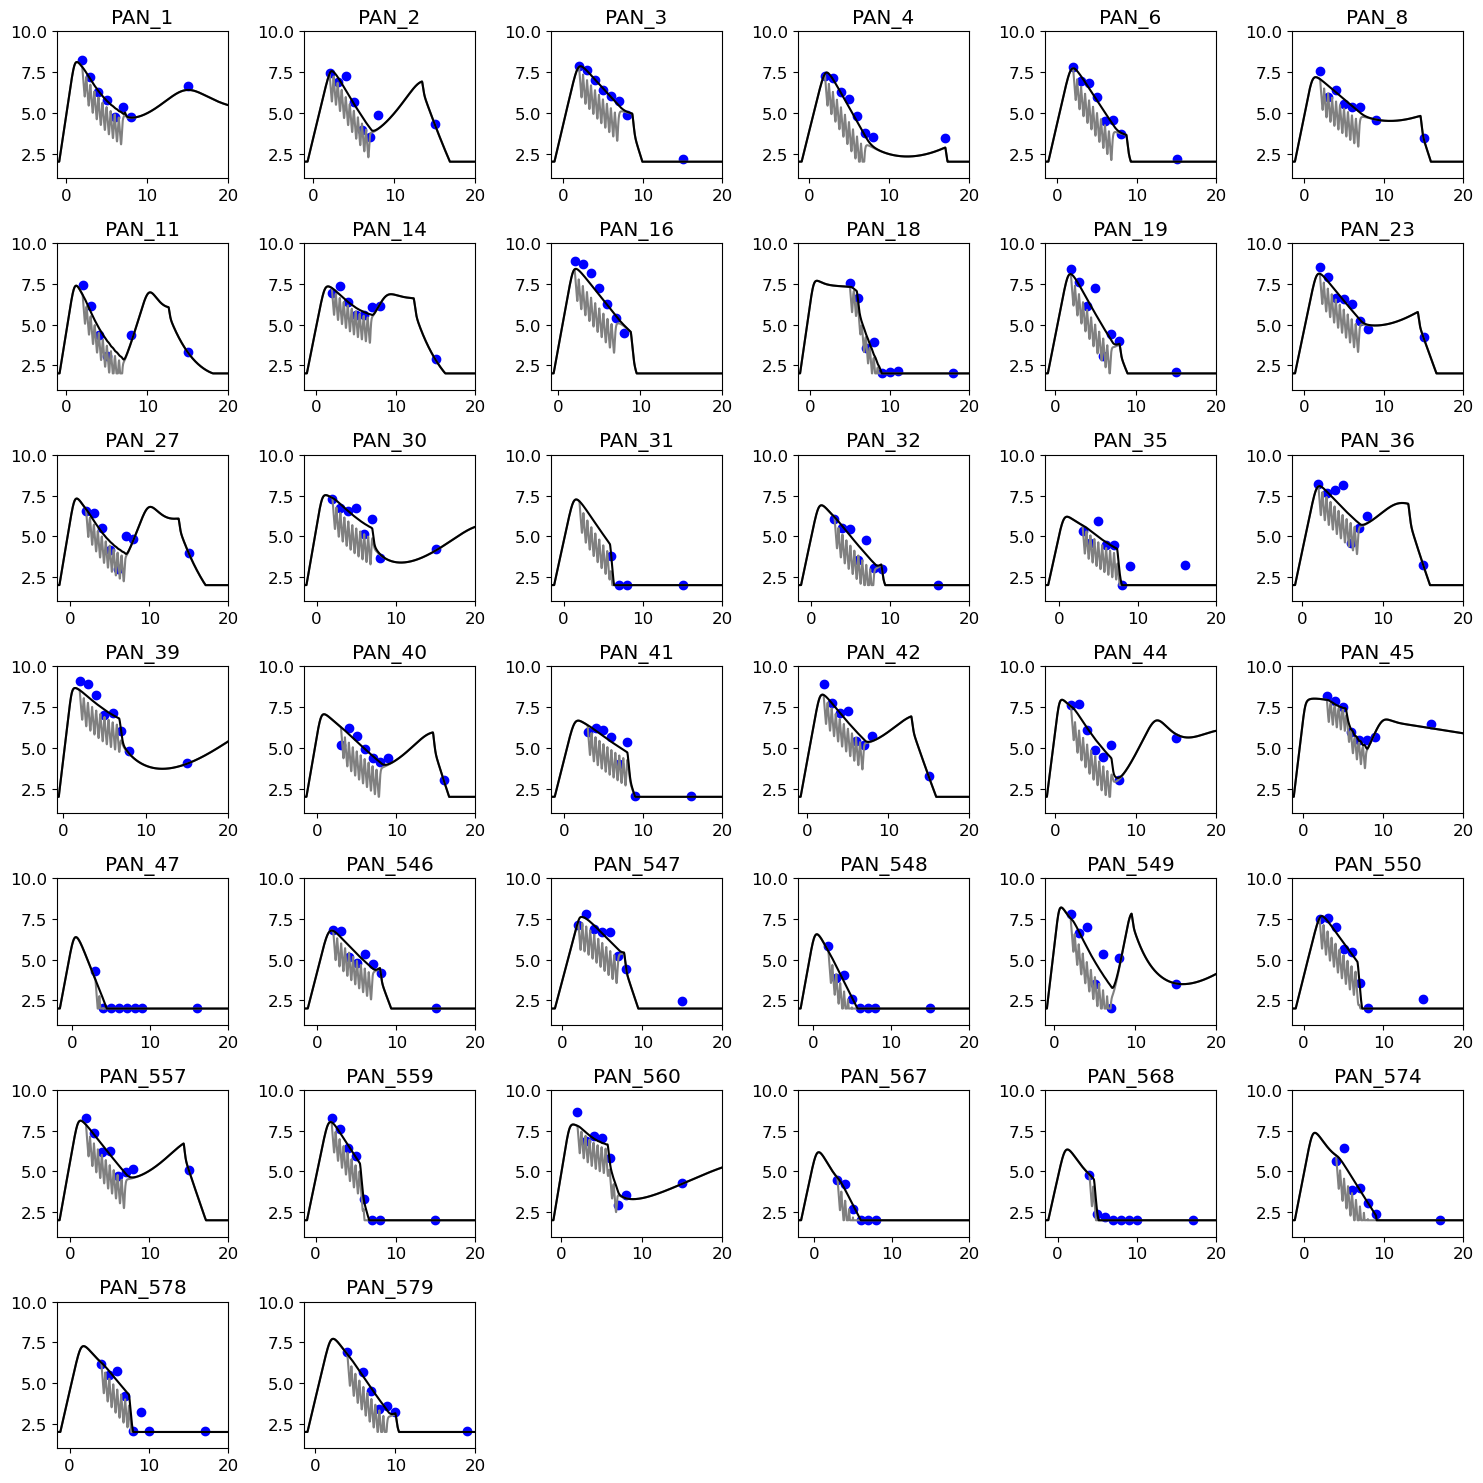

In [62]:
fig = plt.figure(figsize = (15,15))
plt.rcParams.update({'font.size': 12})
Cohort = IDs_Panoramic_trtmnt
dose = 800
drop_VL_trtmnt = []
drop_VL_active_trtmnt=[]
AUC_PANORAMIC_Trtmnt = []
Active_AUC_PANORAMIC_Trtmnt = []
VL_PT_PANORAMIC_Trtmnt=[]
VL_PT_active_PANORAMIC_Trtmnt=[]

VLInd, PKPD_Params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                            parameters_df, Popparameters_df, fixed_params, 
                                            param_order, param_dist, PKPDParams, 
                                            Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                            IC50, Hill,PDOm, dose=8*10**8)
for idi, ID in zip(range(0,len(Cohort)), Cohort):
        
       
        data = Panoramic_Trtmnt[Panoramic_Trtmnt.ID == ID]
        TrtmntStrtDay = data['time_symp'].values[0]
        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_Params[idi], param_dict[idi], 
                                                             10**param_dict[idi]['Log10prf'], MolMass, dose, SetInit, VLPKPD,
                                                             TreatmentLength = 5, TreatmentFrequency = 0.5)
        
       

        data_t = data['time_symp']
        data_y = data['y']
        T,R,E,I,V, Vm, Ag, A1, A2 = y.T
        
        X = np.log10(np.maximum(V+Vm,10**2))
        X_active = np.log10(np.maximum(V,10**2))
        tstart = np.argwhere(t>=TrtmntStrtDay)[0][0]
        tend = np.argwhere(t>=TrtmntStrtDay)[0][0]+16000
        t5 = np.argwhere(t>=TrtmntStrtDay+5)[0][0]
        drop_VL_trtmnt.append(X[tstart:tend]-X[tstart])
        drop_VL_active_trtmnt.append(X_active[tstart:tend]-X_active[tstart])
        AUC_PANORAMIC_Trtmnt.append(auc(t[tstart:t5], X[tstart:t5]))
        Active_AUC_PANORAMIC_Trtmnt.append(auc(t[tstart:t5], X_active[tstart:t5]))
        VL_PT_PANORAMIC_Trtmnt.append(X[tstart:tend])
        VL_PT_active_PANORAMIC_Trtmnt.append(X_active[tstart:tend])
        plt.subplot(7,6, idi+1)
        plt.plot(data_t, data_y, 'o', color = 'b')
        plt.plot(t, X_active, color = 'grey')
        plt.plot(t, X, color = 'black')

        
        plt.xlim([-param_dict[idi]['tzero'], 20])
        plt.ylim([1, 10])
        plt.title(ID)
        plt.tight_layout()
Mean_drop_VL_TotPop_Trtmnt_Panoramic=np.mean(drop_VL_trtmnt, axis=0)    
Active_Mean_drop_VL_TotPop_Trtmnt_Panoramic=np.mean(drop_VL_active_trtmnt, axis=0)   
plt.savefig('Fig/Panoramic_Trtmnt_IndFits.png')
plt.savefig('Fig/Panoramic_Trtmnt_IndFits.svg')
plt.show()

In [42]:
len(drop_VL_trtmnt[10])

16000

In [64]:
pickle.dump(drop_VL_cntrl, open('TotVdrop_Cntrl_PANORAMIC_trialpartis.pickle', 'wb')) 
pickle.dump(drop_VL_trtmnt, open('TotVdrop_PANORAMIC_trialpartis.pickle', 'wb')) 
pickle.dump(drop_VL_active_trtmnt, open('activeVdrop_PANORAMIC_trialpartis.pickle', 'wb'))

pickle.dump(AUC_PANORAMIC_Cntrl, open('AUC_Cntrl_PANORAMIC_trialpartis.pickle', 'wb')) 
pickle.dump(AUC_PANORAMIC_Trtmnt, open('AUC_PANORAMIC_trialpartis.pickle', 'wb')) 
pickle.dump(Active_AUC_PANORAMIC_Trtmnt, open('activeAUC_PANORAMIC_trialpartis.pickle', 'wb'))

pickle.dump(VL_PT_PANORAMIC_Cntrl, open('VL_PT_Cntrl_PANORAMIC_trialpartis.pickle', 'wb')) 
pickle.dump(VL_PT_PANORAMIC_Trtmnt, open('VL_PT_PANORAMIC_trialpartis.pickle', 'wb')) 
pickle.dump(VL_PT_active_PANORAMIC_Trtmnt, open('VL_PT_active_PANORAMIC_trialpartis.pickle', 'wb'))

In [65]:
Mean_drop_VL_TotPop_Cntrl_Panoramic[t_5]

-1.9202308203483867

In [68]:
Mean_drop_VL_TotPop_Trtmnt_Panoramic[t_5]

-3.148306844209684

In [70]:
Active_Mean_drop_VL_TotPop_Trtmnt_Panoramic[t_5]

-3.593659664922137

In [72]:
Mean_drop_VL_TotPop_Cntrl_Panoramic[t_5]-Mean_drop_VL_TotPop_Trtmnt_Panoramic[t_5]

1.2280760238612975

In [74]:
Mean_drop_VL_TotPop_Cntrl_Panoramic[t_5]-Active_Mean_drop_VL_TotPop_Trtmnt_Panoramic[t_5]

1.6734288445737504

In [76]:
Mean_drop_VL_TotPop_Trtmnt_Panoramic[t_5]-Active_Mean_drop_VL_TotPop_Trtmnt_Panoramic[t_5]

0.44535282071245286

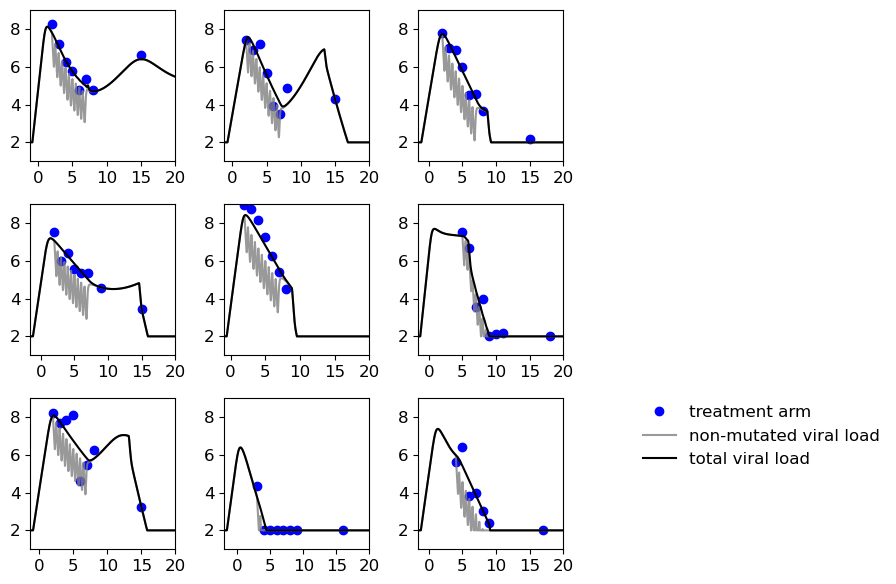

In [78]:
fig = plt.figure(figsize = (6,6))
plt.rcParams.update({'font.size': 12})
Cohort = IDs_Panoramic_trtmnt
dose = 800
TreatmntStrtDay = np.zeros(len(Cohort))
VLInd, PKPD_Params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                            parameters_df, Popparameters_df, fixed_params, 
                                            param_order, param_dist, PKPDParams, 
                                            Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                            IC50, Hill,PDOm, dose=8*10**8)
IDs = ['PAN_1', 'PAN_2', 'PAN_6', 'PAN_8', 'PAN_16', 
       'PAN_18', 'PAN_36', 'PAN_47', 'PAN_574']
idis = [i for i in range(len(Cohort)) if Cohort[i] in IDs]
i=0
for idi, ID, TrtmntStrtDay in zip(idis, Cohort[idis], TreatmntStrtDay[idis]):
        
        data = Panoramic_Trtmnt[Panoramic_Trtmnt.ID == ID]
        TrtmntStrtDay = data['time_symp'].values[0]
        t, y, dosetimes= Trial_Simulation_paramInput(TrtmntStrtDay, VLInd[idi][:], PKPD_Params[idi], param_dict[idi], 
                                                             10**param_dict[idi]['Log10prf'], MolMass, dose, SetInit, VLPKPD,
                                                             TreatmentLength = 5, TreatmentFrequency = 0.5)

        data_t = data['time_symp']
        data_y = data['y']
        T,R,E,I,V, Vm, Ag, A1, A2 = y.T
        X = np.log10(np.maximum(V+Vm,10**2))
        X_active = np.log10(np.maximum(V,10**2))
        plt.subplot(3,3, i+1)
        plt.plot(data_t, data_y, 'o', color = 'b', label = 'treatment arm')
        plt.plot(t, X_active, color = 'grey', alpha=0.8, label = 'non-mutated viral load')
        plt.plot(t, X, color = 'black', label = 'total viral load')
        plt.xlim([-param_dict[idi]['tzero'], 20])
        plt.ylim([1, 9])
        plt.xticks([0, 5, 10, 15,20])
       # plt.title(ID)
        plt.tight_layout()
        i = i+1
        if i==9:
            plt.legend(frameon=False, loc = [1.5,0.5])
plt.savefig('Fig/Panoramic_Trtmnt_SampleIndFits.png')
plt.savefig('Fig/Panoramic_Trtmnt_SampleIndFits.svg')
plt.show()

In [29]:
Cohort = np.hstack([IDs_NBA, IDs_Platcov_Cntrl, IDs_Platcov_trtmnt,IDs_Panoramic_Cntrl, IDs_Panoramic_trtmnt])

params =[]
dose = 800
VLInd, PKPD_Params, param_dict = ParamsPrep(Cohort, 'direct', GetVLIndParams, RandVLParams, 
                                            parameters_df, Popparameters_df, fixed_params, 
                                            param_order, param_dist, PKPDParams, 
                                            Popparameters_MPV, GetPopParams, GetPopParamsOmega, Emax, 
                                            IC50, Hill,PDOm, dose)

for idi, ID in enumerate(Cohort):
    param_dict[idi]['ID'] = ID
    if ID in IDs_Platcov_trtmnt:
        param_dict[idi]['Cohort'] = 'PLATCOV_Trtmnt'
        param_dict[idi]['arm'] = 'trtmnt'
        param_dict[idi]['trial'] = 'PLATCOV'
    elif ID in IDs_Platcov_Cntrl:
        param_dict[idi]['Cohort'] = 'PLATCOV_Cntrl'
        param_dict[idi]['arm'] = 'cntrl'
        param_dict[idi]['trial'] = 'PLATCOV'
    elif ID in IDs_Panoramic_trtmnt:
        param_dict[idi]['Cohort'] = 'Panoramic_Trtmnt'
        param_dict[idi]['arm'] = 'trtmnt'
        param_dict[idi]['trial'] = 'Panoramic'
    elif ID in IDs_Panoramic_Cntrl:
        param_dict[idi]['Cohort'] = 'Panoramic_Cntrl'
        param_dict[idi]['arm'] = 'cntrl'
        param_dict[idi]['trial'] = 'Panoramic'
    else:
        param_dict[idi]['Cohort'] = 'NBA'
        param_dict[idi]['trial'] = 'NBA'
    param_dict[idi]['phi'] = np.log10(param_dict[idi]['phi'])
    param_dict[idi]['Log10prf'] = 10**(param_dict[idi]['Log10prf'])
  #  param_dict[idi]['EC50'] = 177*(param_dict[idi]['Log10prf'])

param_DF = pd.DataFrame(param_dict)
param_DF = param_DF.rename(columns={'Log10prf':'paf'})

In [78]:
param_DF

,c,k,beta,pi,rho,phi,delta,m,tau,tzero,Vzero,paf,ID,Cohort,trial,arm
0,15,4,4.950055e-08,378.216089,0.010097,-4.96717,2.73836,19.3319,10.99060,2.49251,97,0.452436,460_2,NBA,NBA,NaN
1,15,4,4.979549e-08,597.901992,0.085406,-4.94898,1.46186,24.9256,7.14837,2.16513,97,0.433630,407_1,NBA,NBA,NaN
2,15,4,4.969011e-08,852.785878,0.009701,-6.52804,1.17758,19.7921,11.81870,1.19396,97,0.402275,1053_1,NBA,NBA,NaN
3,15,4,4.953589e-08,216.865266,0.035959,-4.55721,1.27492,19.1518,6.84482,2.61974,97,0.526583,2969_1,NBA,NBA,NaN
4,15,4,4.946864e-08,213.870064,0.091639,-5.30047,1.44260,18.4761,8.90981,1.76694,97,0.659092,352_1,NBA,NBA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,15,4,5.000806e-08,701.293801,0.030842,-3.69313,2.41889,17.0955,7.77871,2.09790,97,0.127382,PAN_567,Panoramic_Trtmnt,Panoramic,trtmnt
1248,15,4,4.991488e-08,633.286164,0.027362,-3.88944,1.91151,20.8227,4.55790,1.61323,97,0.137389,PAN_568,Panoramic_Trtmnt,Panoramic,trtmnt
1249,15,4,4.988385e-08,799.281940,0.043130,-4.75127,1.97315,18.5501,9.00195,1.55875,97,0.095236,PAN_574,Panoramic_Trtmnt,Panoramic,trtmnt
1250,15,4,4.977371e-08,573.455867,0.035328,-4.89139,1.50867,19.1459,7.46079,1.60571,97,0.181437,PAN_578,Panoramic_Trtmnt,Panoramic,trtmnt


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PLATCOV_Cntrl vs. PLATCOV_Trtmnt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.732e+03
Panoramic_Cntrl vs. Panoramic_Trtmnt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=7.725e+02
PLATCOV_Trtmnt vs. Panoramic_Cntrl: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.416e+03
PLATCOV_Cntrl vs. Panoramic_Cntrl: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.866e+03
PLATCOV_Trtmnt vs. Panoramic_Trtmnt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.220e+03
PLATCOV_Cntrl vs. Panoramic_Trtmnt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.632e+03
p-va

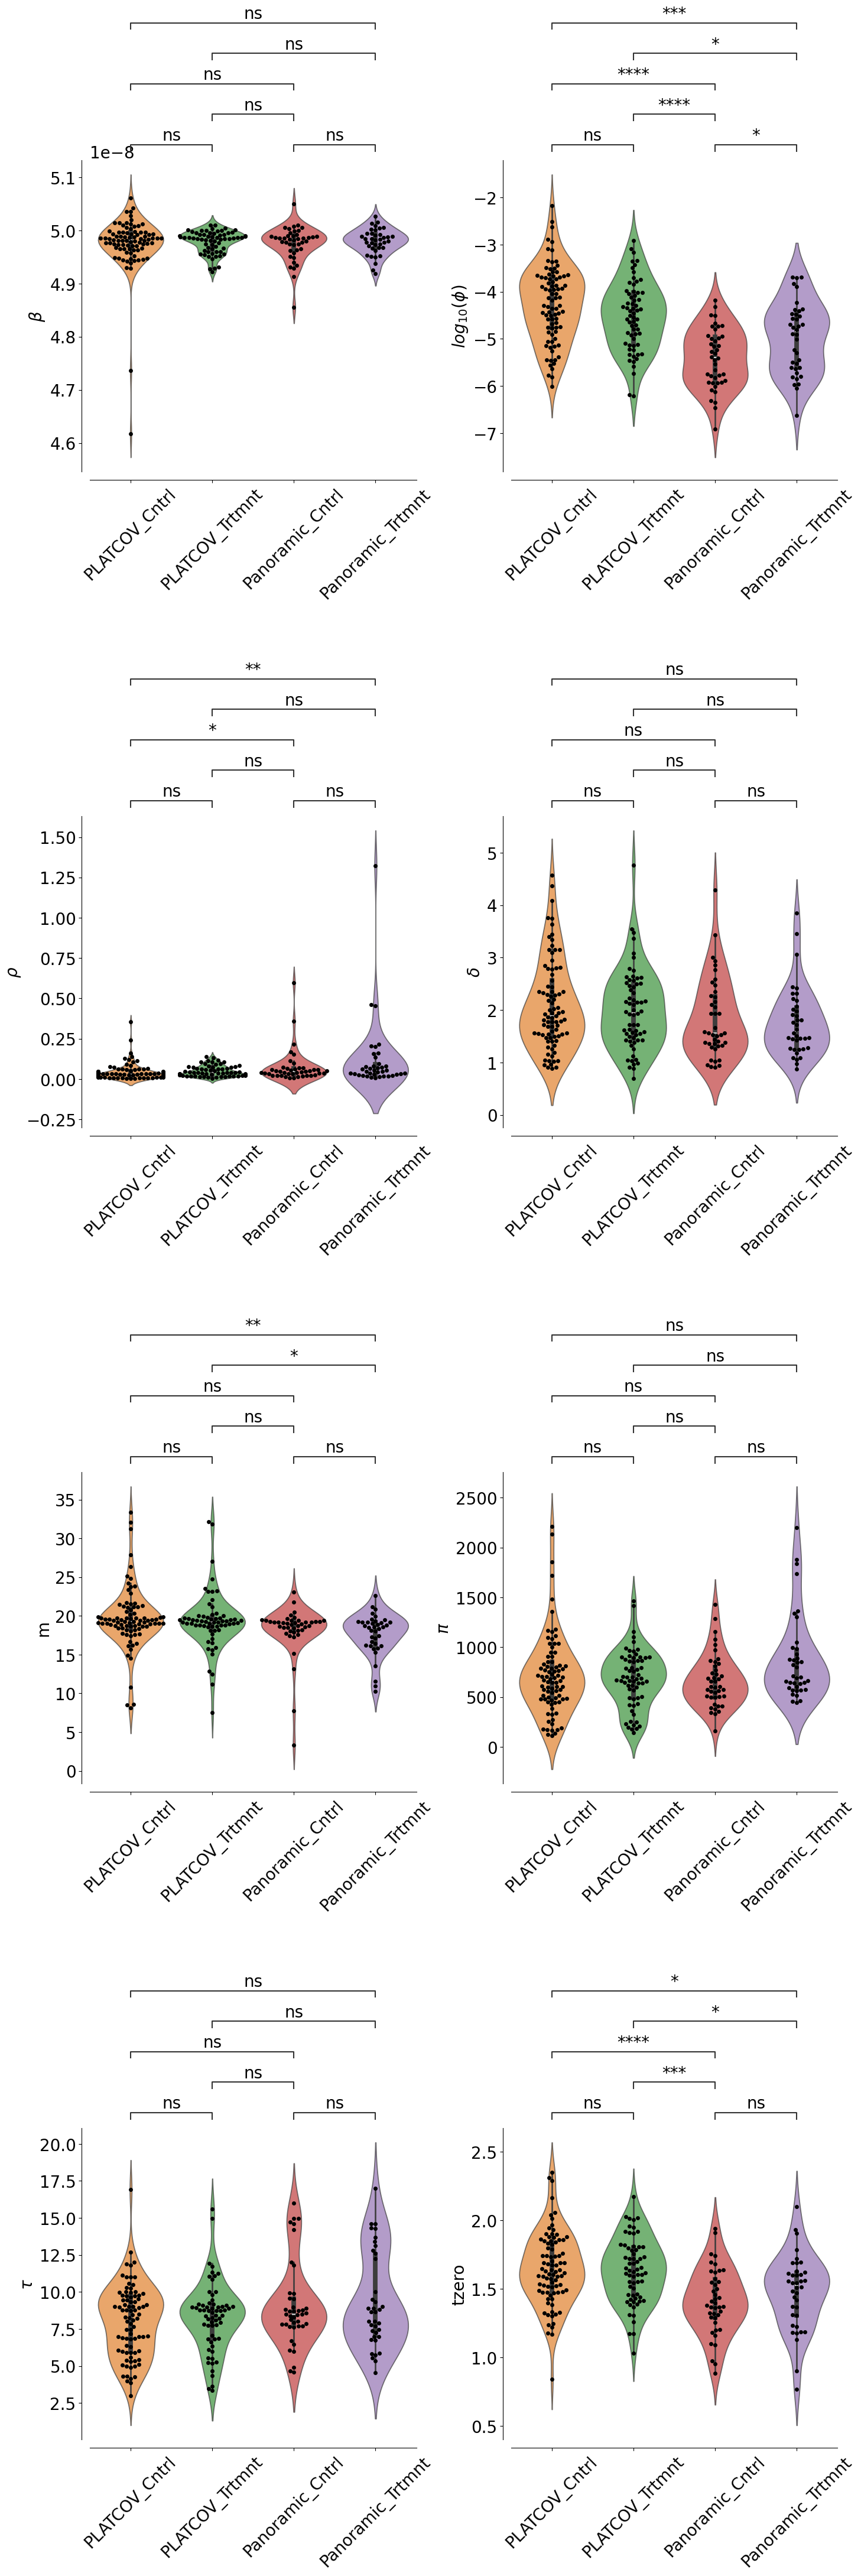

In [44]:
fig = plt.figure(figsize = (15,45))
plt.rcParams.update({'font.size': 20})
color = {'PLATCOV_Cntrl': 'tab:orange', 'PLATCOV_Trtmnt': 'tab:green', 'Panoramic_Cntrl': 'tab:red', 
         'Panoramic_Trtmnt': 'tab:purple'}
math_Sym = ['$\\beta$', '$log_{10}(\\phi)$', '$\\rho$', '$\\delta$', 'm', '$\\pi$', '$\\tau$', 'tzero']
for i, VLParam in enumerate(['beta', 'phi', 'rho', 'delta', 'm', 'pi', 'tau', 'tzero']):
    plt.subplot(4,2,i+1)
    ax = sns.swarmplot(x='Cohort', y=VLParam, data = param_DF, color = 'k')
    ax= sns.violinplot(x='Cohort', y=VLParam, data = param_DF, palette = color, alpha = 0.7)

 #   if VLParam == 'phi' or VLParam == 'tzero': 
   #     annotator = Annotator(ax, 
   #                           [('NBA', 'PLATCOV_Cntrl'), ('NBA', 'PLATCOV_Trtmnt')], 
   #                           data=param_DF, x='Cohort', y=VLParam)
   #     annotator.configure(test = 'Mann-Whitney', comparisons_correction="bonferroni", 
    #                        loc='outside').apply_and_annotate()
    #if VLParam == 'tau': 
    sns.despine(offset=10, trim=False)
    ax.set_ylabel(math_Sym[i], fontsize = 20)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=45)
    annotator = Annotator(ax, 
                          [('PLATCOV_Cntrl','PLATCOV_Trtmnt'),  
                           ('Panoramic_Cntrl','Panoramic_Trtmnt'), ('PLATCOV_Cntrl', 'Panoramic_Cntrl'), 
                          ('PLATCOV_Cntrl', 'Panoramic_Trtmnt'), ('PLATCOV_Trtmnt', 'Panoramic_Cntrl'),
                          ('PLATCOV_Trtmnt', 'Panoramic_Trtmnt')], 
                          data=param_DF, x='Cohort', y=VLParam)
    annotator.configure(test = 'Mann-Whitney', comparisons_correction="bonferroni", 
                        loc='outside').apply_and_annotate()
   
    for p in ax.patches:
        mybox =p
        color = mybox.get_facecolor()
        mybox.set_facecolor((0, 0, 0, 0))
        mybox.set_edgecolor('black')
        
plt.tight_layout(h_pad = 0., w_pad=0.0)
plt.savefig('Fig/NBA_PlATCOV_Panoramic_ParameterComp.png')
plt.savefig('Fig/NBA_PlATCOV_Panoramic_ParameterComp.svg')
plt.show()

In [148]:
param_DF_trtmnt=param_DF[(param_DF.Cohort!='NBA')&(param_DF.Cohort!='Panoramic_Cntrl')&(param_DF.Cohort!='PLATCOV_Cntrl')]

In [150]:
param_DF_trtmnt

,c,k,beta,pi,rho,phi,delta,m,tau,tzero,Vzero,paf,ID,Cohort,trial,arm
1108,15,4,4.999194e-08,568.983929,0.137214,-5.31724,1.466990,16.5441,15.60630,1.41137,97,0.108617,PLT-TH1-273,PLATCOV_Trtmnt,PLATCOV,trtmnt
1109,15,4,4.954844e-08,435.211137,0.021051,-3.74589,0.912661,19.6617,9.99850,1.72232,97,0.081914,PLT-TH1-276,PLATCOV_Trtmnt,PLATCOV,trtmnt
1110,15,4,4.984711e-08,417.984329,0.035449,-4.86315,0.963751,19.6549,8.27450,1.61302,97,0.142267,PLT-TH1-292,PLATCOV_Trtmnt,PLATCOV,trtmnt
1111,15,4,4.973132e-08,1462.143507,0.105940,-4.07950,2.147500,32.1222,9.17147,1.45658,97,0.229847,PLT-TH1-293,PLATCOV_Trtmnt,PLATCOV,trtmnt
1112,15,4,4.985400e-08,861.410180,0.025981,-4.50023,2.635590,19.1863,8.43567,1.68792,97,0.107726,PLT-TH1-301,PLATCOV_Trtmnt,PLATCOV,trtmnt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,15,4,5.000806e-08,701.293801,0.030842,-3.69313,2.418890,17.0955,7.77871,2.09790,97,0.127382,PAN_567,Panoramic_Trtmnt,Panoramic,trtmnt
1248,15,4,4.991488e-08,633.286164,0.027362,-3.88944,1.911510,20.8227,4.55790,1.61323,97,0.137389,PAN_568,Panoramic_Trtmnt,Panoramic,trtmnt
1249,15,4,4.988385e-08,799.281940,0.043130,-4.75127,1.973150,18.5501,9.00195,1.55875,97,0.095236,PAN_574,Panoramic_Trtmnt,Panoramic,trtmnt
1250,15,4,4.977371e-08,573.455867,0.035328,-4.89139,1.508670,19.1459,7.46079,1.60571,97,0.181437,PAN_578,Panoramic_Trtmnt,Panoramic,trtmnt


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PLATCOV_Trtmnt vs. Panoramic_Trtmnt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.059e-02 U_stat=9.710e+02


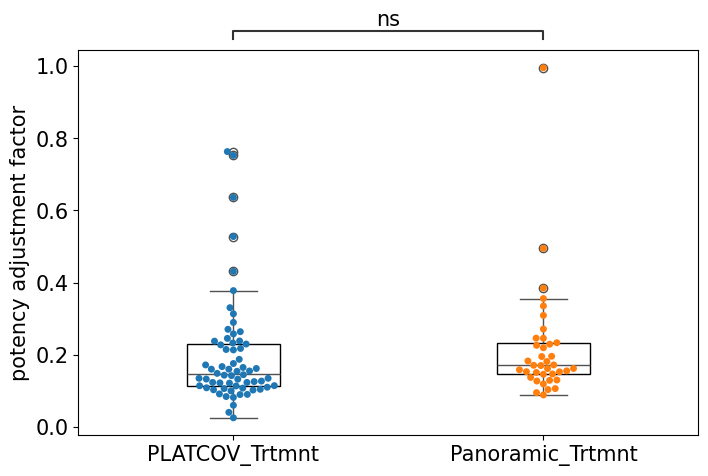

In [156]:
fig = plt.figure(figsize = (8,5))
plt.rcParams.update({'font.size': 15})
color = ['tab:blue', 'tab:orange']
ax = sns.swarmplot(x='Cohort', y='paf', data = param_DF_trtmnt, palette = color)
ax = sns.boxplot(x='Cohort', y='paf', data = param_DF_trtmnt, width=0.3)
ax.set_xlabel('')
annotator = Annotator(ax, 
                          [('Panoramic_Trtmnt','PLATCOV_Trtmnt')], 
                          data=param_DF_trtmnt, x='Cohort', y='paf')
annotator.configure(test = 'Mann-Whitney', comparisons_correction="bonferroni", 
                    loc='outside').apply_and_annotate()
for p in ax.patches:
    mybox =p
    color = mybox.get_facecolor()
    mybox.set_facecolor((0, 0, 0, 0))
    mybox.set_edgecolor('black')
ax.set_ylabel('potency adjustment factor')
#ax.set_yticks([0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
#ax.set_yticks([10,25,37, 50,61, 75,100])
#sns.despine(offset=10, trim=False)
plt.savefig('Fig/prfComp.png')
plt.savefig('Fig/prfComp.svg')
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PLATCOV_Trtmnt vs. Panoramic_Trtmnt: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.059e-02 U_stat=9.710e+02


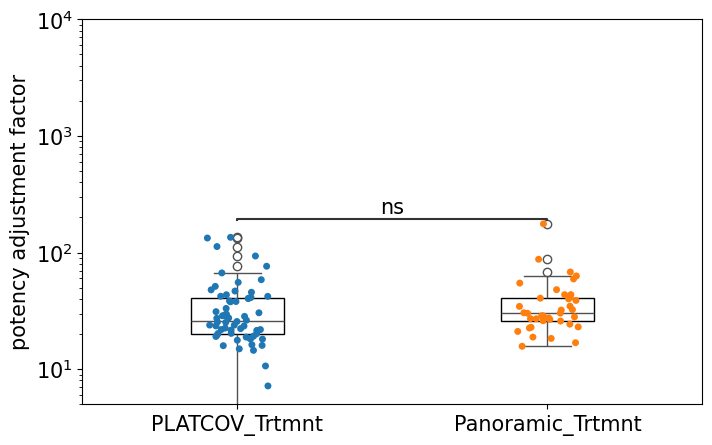

In [58]:
fig = plt.figure(figsize = (8,5))
plt.rcParams.update({'font.size': 15})
color = ['tab:blue', 'tab:orange']
ax = sns.stripplot(x='Cohort', y='EC50', data = param_DF_trtmnt, palette = color)
ax = sns.boxplot(x='Cohort', y='EC50', data = param_DF_trtmnt, width=0.3)
ax.set_xlabel('')
annotator = Annotator(ax, 
                          [('Panoramic_Trtmnt','PLATCOV_Trtmnt')], 
                          data=param_DF_trtmnt, x='Cohort', y='Log10prf')
annotator.configure(test = 'Mann-Whitney', comparisons_correction="bonferroni", 
                    loc='outside').apply_and_annotate()
for p in ax.patches:
    mybox =p
    color = mybox.get_facecolor()
    mybox.set_facecolor((0, 0, 0, 0))
    mybox.set_edgecolor('black')
ax.set_ylabel('potency adjustment factor')
ax.set_yscale('log')
ax.set_ylim([5,10000])
#ax.set_yticks([0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
#ax.set_yticks([10,25,37, 50,61, 75,100])
#sns.despine(offset=10, trim=False)
plt.show()

In [81]:
np.median(param_DF_trtmnt.EC50)

28.207881703543897

Text(0, 0.5, 'potency adjustment factor')

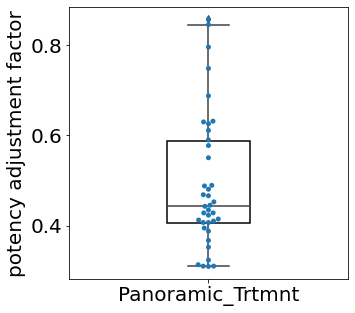

In [117]:
fig = plt.figure(figsize = (5,5))
plt.rcParams.update({'font.size': 20})
ax = sns.swarmplot(x='Cohort', y='Log10prf', data = param_DF[param_DF.Cohort == 'Panoramic_Trtmnt'])
ax = sns.boxplot(x='Cohort', y='Log10prf', data = param_DF[param_DF.Cohort == 'Panoramic_Trtmnt'], width=0.3)
ax.set_xlabel('')
for p in ax.patches:
    mybox =p
    color = mybox.get_facecolor()
    mybox.set_facecolor((0, 0, 0, 0))
    mybox.set_edgecolor('black')
ax.set_ylabel('potency adjustment factor')
#ax.set_yticks([0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
#ax.set_yticks([10,25,37, 50,61, 75,100])
#sns.despine(offset=10, trim=False)

In [118]:
prf_Platcov = param_DF[param_DF.Cohort == 'PLATCOV_Trtmnt'].Log10prf.values
prf_Panoramic = param_DF[param_DF.Cohort == 'Panoramic_Trtmnt'].Log10prf.values

In [120]:
prf_mean_Platcov = np.mean(prf_Platcov)
prf_mean_Platcov

0.1959251857518042

In [122]:
prf_mean_Panoramic = np.mean(prf_Panoramic)
prf_mean_Panoramic

0.21687921358590234

In [124]:
prf_std_Platcov = np.std(prf_Platcov)
prf_std_Platcov

0.14641454549466493

In [126]:
prf_std_Panoramic = np.std(prf_Panoramic)
prf_std_Panoramic

0.15380416255085386

In [128]:
prf_median_Platcov = np.median(prf_Platcov)
prf_median_Platcov

0.14667219802172224

In [130]:
prf_median_Panoramic = np.median(prf_Panoramic)
prf_median_Panoramic

0.17059108939286394

In [132]:
IQR_25_Platcov = np.percentile(prf_Platcov, 25)
IQR_75_Platcov = np.percentile(prf_Platcov, 75)
prf_min_Platcov = np.min(prf_Platcov)
prf_max_Platcov = np.max(prf_Platcov)

In [134]:
IQR_25_Panoramic = np.percentile(prf_Panoramic, 25)
IQR_75_Panoramic = np.percentile(prf_Panoramic, 75)
prf_min_Panoramic = np.min(prf_Panoramic)
prf_max_Panoramic = np.max(prf_Panoramic)

In [136]:
IQR_25_Panoramic

0.1462423032954754

In [138]:
IQR_25_Platcov

0.11286515337875662

In [140]:
IQR_75_Panoramic

0.23242335744838155

In [142]:
IQR_75_Platcov

0.23056441994992877

In [144]:
prf_min_Platcov

0.02552348658303635

In [146]:
prf_min_Panoramic

0.08879121524087082

In [148]:
prf_max_Platcov

0.763062304832935

In [150]:
prf_max_Panoramic

0.9952460440367631

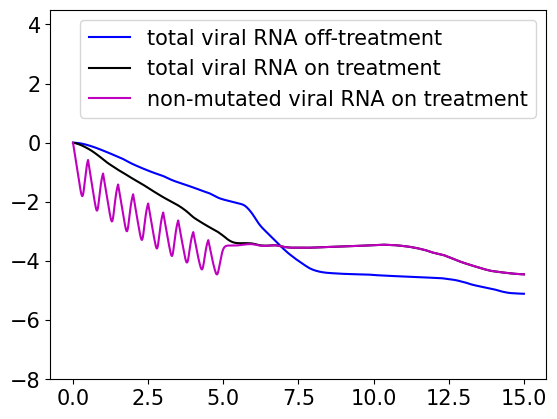

In [152]:
plt.plot(np.linspace(0, 14.999, 15000), Mean_drop_VL_TotPop_Cntrl_Panoramic[0:15000], color = 'b', label = 'total viral RNA off-treatment')
plt.plot(np.linspace(0, 14.999, 15000), Mean_drop_VL_TotPop_Trtmnt_Panoramic[0:15000], color = 'k', label = 'total viral RNA on treatment')
plt.plot(np.linspace(0, 14.999, 15000), Active_Mean_drop_VL_TotPop_Trtmnt_Panoramic[0:15000], color = 'm', label = 'non-mutated viral RNA on treatment')
plt.legend()
plt.ylim([-8,4.5])
plt.savefig('Fig/panoramic_meanVLdropComp.png')
plt.savefig('Fig/panoramic_meanVLdropComp.svg')
plt.show()

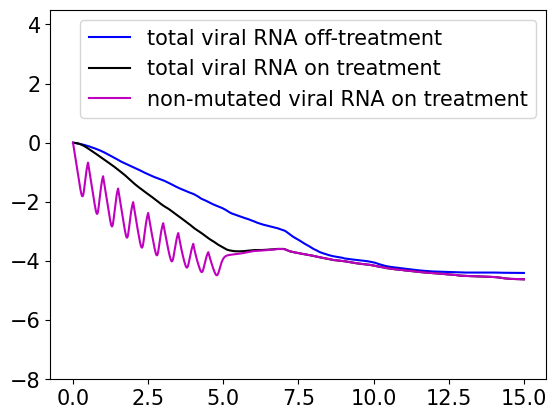

In [154]:
plt.plot(np.linspace(0, 14.999, 15000), Mean_drop_VL_TotPop_Cntrl_PLATCOV[0:15000], color = 'b', label = 'total viral RNA off-treatment')
plt.plot(np.linspace(0, 14.999, 15000), Mean_drop_VL_TotPop_Trtmnt_PLATCOV[0:15000], color = 'k', label = 'total viral RNA on treatment')
plt.plot(np.linspace(0, 14.999, 15000), Active_Mean_drop_VL_TotPop_Trtmnt_PLATCOV[0:15000], color = 'm', label = 'non-mutated viral RNA on treatment')
plt.legend()
plt.ylim([-8,4.5])
plt.savefig('Fig/platcov_meanVLdropComp.png')
plt.savefig('Fig/platcov_meanVLdropComp.svg')
plt.show()


In [58]:
t_0_PLATCOV = param_DF[(param_DF.Cohort!='NBA')&(param_DF.Cohort!='Panoramic_Cntrl')&(param_DF.Cohort!='Panoramic_Trtrmnt')].tzero
t_0_Panoramic = param_DF[(param_DF.Cohort!='NBA')&(param_DF.Cohort!='PLATCOV_Cntrl')&(param_DF.Cohort!='PLATCOV_Trtrmnt')].tzero
t_0_NBA = param_DF[param_DF.Cohort=='NBA'].tzero


In [56]:
np.median(t_0_PLATCOV)

1.60255

In [60]:
np.median(t_0_Panoramic)

1.545895

In [62]:
np.median(t_0_NBA)

2.16513

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

NBA vs. PLATCOV: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.397e-26 U_stat=1.178e+05
PLATCOV vs. Panoramic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.780e-07 U_stat=8.449e+03
NBA vs. Panoramic: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.075e-26 U_stat=7.054e+04


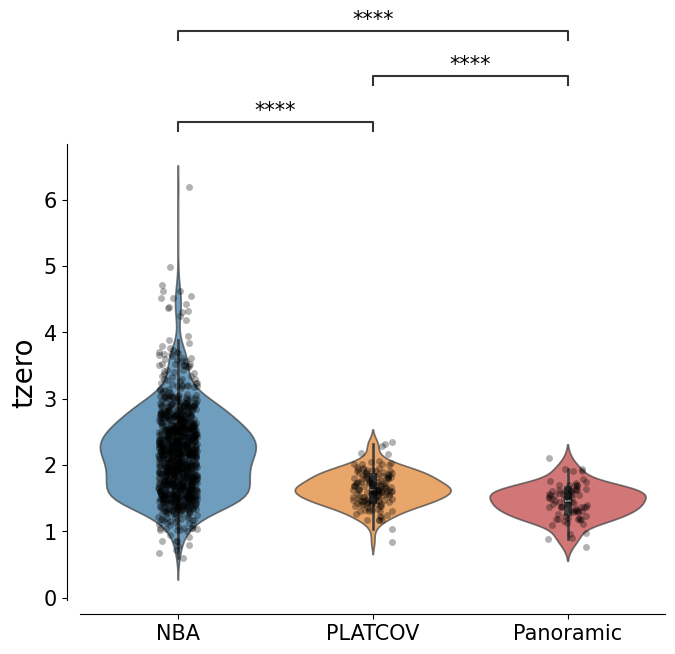

In [88]:
fig = plt.figure(figsize = (7,7))
plt.rcParams.update({'font.size': 15})
color = {'NBA': 'tab:blue','PLATCOV': 'tab:orange', 'Panoramic': 'tab:red'}
math_Sym = ['tzero']
for i, VLParam in enumerate(['tzero']):
    plt.subplot(1,1,i+1)
    ax = sns.stripplot(x='trial', y=VLParam, data = param_DF, color = 'k', alpha = 0.3)
    ax= sns.violinplot(x='trial', y=VLParam, data = param_DF, palette = color, alpha = 0.7)

 #   if VLParam == 'phi' or VLParam == 'tzero': 
   #     annotator = Annotator(ax, 
   #                           [('NBA', 'PLATCOV_Cntrl'), ('NBA', 'PLATCOV_Trtmnt')], 
   #                           data=param_DF, x='Cohort', y=VLParam)
   #     annotator.configure(test = 'Mann-Whitney', comparisons_correction="bonferroni", 
    #                        loc='outside').apply_and_annotate()
    #if VLParam == 'tau': 
    sns.despine(offset=10, trim=False)
    ax.set_ylabel(math_Sym[i], fontsize = 20)
    ax.set_xlabel('')
    ax.tick_params(axis='x')
    annotator = Annotator(ax, 
                          [('NBA', 'PLATCOV'),('NBA','Panoramic'),('PLATCOV', 'Panoramic')],
                          data=param_DF, x='trial', y=VLParam)
    annotator.configure(test = 'Mann-Whitney', comparisons_correction="bonferroni", 
                        loc='outside').apply_and_annotate()
   
    for p in ax.patches:
        mybox =p
        color = mybox.get_facecolor()
        mybox.set_facecolor((0, 0, 0, 0))
        mybox.set_edgecolor('black')
        
plt.tight_layout(h_pad = 0., w_pad=0.0)
plt.savefig('Fig/tzero_comp.png')
plt.savefig('Fig/tzero_comp.svg')
plt.show()

In [136]:
t_SymToTrtm_PLATCOV = PLATCOV.groupby('ID').time_symp.min()
t_SymToTrtm_panoramic = Panoramic.groupby('ID').time_symp.min()

In [142]:
print(np.median(t_SymToTrtm_PLATCOV))
print(np.median(t_SymToTrtm_panoramic))

2.0
2.0


In [172]:
t_InfToTrtm_PLATCOV = param_DF[(param_DF['trial']=='PLATCOV')].sort_values(by = 'ID').tzero.values+PLATCOV.groupby('ID').time_symp.min().reset_index(drop = True).values
t_InfToTrtm_Panoramic = param_DF[(param_DF['trial']=='Panoramic')].sort_values(by = 'ID').tzero.values+Panoramic.groupby('ID').time_symp.min().reset_index(drop = True).values




In [174]:
print(np.median(t_InfToTrtm_PLATCOV))
print(np.median(t_InfToTrtm_Panoramic))

3.6285600000000002
3.58591


In [116]:
#Fig2a
IDs = ['PLT-TH1-275', 'PLT-TH1-280', 'PLT-TH1-345', 'PLT-TH1-474', 'PLT-TH1-513', 'PLT-TH1-637','PLT-TH1-503', 'PLT-TH1-615', 
       'PLT-TH1-577', 'PLT-TH1-276', 'PLT-TH1-304', 'PLT-TH1-422', 'PLT-TH1-273', 'PLT-TH1-466', 'PLT-TH1-546', 'PLT-TH1-612', 
       'PLT-TH1-548', 'PLT-TH1-330']
param_DF_fig2a = param_DF[param_DF['ID'].isin(IDs)]
param_DF_fig2a['ka'] = PKPD_Params[0]['ka']
param_DF_fig2a['kPL'] = PKPD_Params[0]['k12']
param_DF_fig2a['kLP'] = PKPD_Params[0]['k21']
param_DF_fig2a['kCL'] = PKPD_Params[0]['kcl']
param_DF_fig2a['Vol'] = PKPD_Params[0]['Vol']
param_DF_fig2a['Emax'] = PKPD_Params[0]['Emax']
param_DF_fig2a['Hill'] = PKPD_Params[0]['Hill']
param_DF_fig2a['EC50'] = PKPD_Params[0]['IC50']
param_DF_fig2a['dose_mg'] = 800

In [136]:
param_DF_fig2a.loc[param_DF_fig2a['arm']=='cntrl', 'ka']=''
param_DF_fig2a.loc[param_DF_fig2a['arm']=='cntrl', 'kPL']=''
param_DF_fig2a.loc[param_DF_fig2a['arm']=='cntrl', 'kLP']=''
param_DF_fig2a.loc[param_DF_fig2a['arm']=='cntrl', 'Vol']=''
param_DF_fig2a.loc[param_DF_fig2a['arm']=='cntrl', 'Emax']=''
param_DF_fig2a.loc[param_DF_fig2a['arm']=='cntrl', 'Hill']=''
param_DF_fig2a.loc[param_DF_fig2a['arm']=='cntrl', 'EC50']=''
param_DF_fig2a.loc[param_DF_fig2a['arm']=='cntrl', 'paf']=''
param_DF_fig2a.loc[param_DF_fig2a['arm']=='cntrl', 'kCL']=''
param_DF_fig2a.loc[param_DF_fig2a['arm']=='cntrl', 'dose_mg']=''

In [142]:
param_DF_fig2a.to_excel('/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Molnupiravir/for submission/JCI/secondRevision/DataFile/Data_File_fig2a.xlsx', index=False)

In [144]:
#Fig2b
IDs = ['PAN_5', 'PAN_22', 'PAN_25', 'PAN_29', 'PAN_43', 'PAN_551','PAN_562', 'PAN_552', 'PAN_566', 'PAN_1', 'PAN_2', 
       'PAN_6', 'PAN_8', 'PAN_16', 'PAN_18', 'PAN_36', 'PAN_47', 'PAN_574']
param_DF_fig2b = param_DF[param_DF['ID'].isin(IDs)]
param_DF_fig2b['ka'] = PKPD_Params[0]['ka']
param_DF_fig2b['kPL'] = PKPD_Params[0]['k12']
param_DF_fig2b['kLP'] = PKPD_Params[0]['k21']
param_DF_fig2b['kCL'] = PKPD_Params[0]['kcl']
param_DF_fig2b['Vol'] = PKPD_Params[0]['Vol']
param_DF_fig2b['Emax'] = PKPD_Params[0]['Emax']
param_DF_fig2b['Hill'] = PKPD_Params[0]['Hill']
param_DF_fig2b['EC50'] = PKPD_Params[0]['IC50']
param_DF_fig2b['dose_mg'] = 800
param_DF_fig2b.loc[param_DF_fig2b['arm']=='cntrl', 'ka']=''
param_DF_fig2b.loc[param_DF_fig2b['arm']=='cntrl', 'kPL']=''
param_DF_fig2b.loc[param_DF_fig2b['arm']=='cntrl', 'kLP']=''
param_DF_fig2b.loc[param_DF_fig2b['arm']=='cntrl', 'Vol']=''
param_DF_fig2b.loc[param_DF_fig2b['arm']=='cntrl', 'Emax']=''
param_DF_fig2b.loc[param_DF_fig2b['arm']=='cntrl', 'Hill']=''
param_DF_fig2b.loc[param_DF_fig2b['arm']=='cntrl', 'EC50']=''
param_DF_fig2b.loc[param_DF_fig2b['arm']=='cntrl', 'paf']=''
param_DF_fig2b.loc[param_DF_fig2b['arm']=='cntrl', 'kCL']=''
param_DF_fig2b.loc[param_DF_fig2b['arm']=='cntrl', 'dose_mg']=''

In [146]:
param_DF_fig2b.to_excel('/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Molnupiravir/for submission/JCI/secondRevision/DataFile/Data_File_fig2b.xlsx', index=False)

In [162]:
param_DF_fig2c = param_DF_trtmnt[['Cohort', 'paf']]

In [166]:
param_DF_fig2c.to_excel('/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Molnupiravir/for submission/JCI/secondRevision/DataFile/Data_File_fig2c.xlsx', index=False)

In [31]:
param_DF_fig7a = param_DF[param_DF['trial']=='PLATCOV']
param_DF_fig7a['ka'] = PKPD_Params[0]['ka']
param_DF_fig7a['kPL'] = PKPD_Params[0]['k12']
param_DF_fig7a['kLP'] = PKPD_Params[0]['k21']
param_DF_fig7a['kCL'] = PKPD_Params[0]['kcl']
param_DF_fig7a['Vol'] = PKPD_Params[0]['Vol']
param_DF_fig7a['Emax'] = PKPD_Params[0]['Emax']
param_DF_fig7a['Hill'] = PKPD_Params[0]['Hill']
param_DF_fig7a['EC50'] = PKPD_Params[0]['IC50']
param_DF_fig7a['dose_mg'] = 800
param_DF_fig7a.loc[param_DF_fig7a['arm']=='cntrl', 'ka']=''
param_DF_fig7a.loc[param_DF_fig7a['arm']=='cntrl', 'kPL']=''
param_DF_fig7a.loc[param_DF_fig7a['arm']=='cntrl', 'kLP']=''
param_DF_fig7a.loc[param_DF_fig7a['arm']=='cntrl', 'Vol']=''
param_DF_fig7a.loc[param_DF_fig7a['arm']=='cntrl', 'Emax']=''
param_DF_fig7a.loc[param_DF_fig7a['arm']=='cntrl', 'Hill']=''
param_DF_fig7a.loc[param_DF_fig7a['arm']=='cntrl', 'EC50']=''
param_DF_fig7a.loc[param_DF_fig7a['arm']=='cntrl', 'paf']=''
param_DF_fig7a.loc[param_DF_fig7a['arm']=='cntrl', 'kCL']=''
param_DF_fig7a.loc[param_DF_fig7a['arm']=='cntrl', 'dose_mg']=''

In [33]:
param_DF_fig7a.to_excel('/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Molnupiravir/for submission/JCI/secondRevision/DataFile/Data_File_fig7a.xlsx', index=False)

In [35]:
param_DF_fig7b = param_DF[param_DF['trial']=='Panoramic']
param_DF_fig7b['ka'] = PKPD_Params[0]['ka']
param_DF_fig7b['kPL'] = PKPD_Params[0]['k12']
param_DF_fig7b['kLP'] = PKPD_Params[0]['k21']
param_DF_fig7b['kCL'] = PKPD_Params[0]['kcl']
param_DF_fig7b['Vol'] = PKPD_Params[0]['Vol']
param_DF_fig7b['Emax'] = PKPD_Params[0]['Emax']
param_DF_fig7b['Hill'] = PKPD_Params[0]['Hill']
param_DF_fig7b['EC50'] = PKPD_Params[0]['IC50']
param_DF_fig7b['dose_mg'] = 800
param_DF_fig7b.loc[param_DF_fig7b['arm']=='cntrl', 'ka']=''
param_DF_fig7b.loc[param_DF_fig7b['arm']=='cntrl', 'kPL']=''
param_DF_fig7b.loc[param_DF_fig7b['arm']=='cntrl', 'kLP']=''
param_DF_fig7b.loc[param_DF_fig7b['arm']=='cntrl', 'Vol']=''
param_DF_fig7b.loc[param_DF_fig7b['arm']=='cntrl', 'Emax']=''
param_DF_fig7b.loc[param_DF_fig7b['arm']=='cntrl', 'Hill']=''
param_DF_fig7b.loc[param_DF_fig7b['arm']=='cntrl', 'EC50']=''
param_DF_fig7b.loc[param_DF_fig7b['arm']=='cntrl', 'paf']=''
param_DF_fig7b.loc[param_DF_fig7b['arm']=='cntrl', 'kCL']=''
param_DF_fig7b.loc[param_DF_fig7b['arm']=='cntrl', 'dose_mg']=''

In [37]:
param_DF_fig7b.to_excel('/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/Covid-19/Molnupiravir/for submission/JCI/secondRevision/DataFile/Data_File_fig7b.xlsx', index=False)